# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

Dataset here : https://www.batadal.net/data.html You will need Training Dataset 1, Training Dataset 1 and Test Dataset.

## Group Number : 37

## Student 1 
### Name :
### ID :

## Student 2
### Name : Menno Bezema
### ID : 4248252

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

We added a requirements.txt file, install all the requirements using pip install -r requirements.txt

TODO: create the file with all dependencies:
- statsmodels
- pandas
- numpy
- matplotlib
- seaborn
- tslearn

### index (Easy navigation to sections)
0. [Pre-processing](#0)
1. [Familiarization task](#1)
    - [Answer the Three Question (and Visualization)](#1a)
2. [LOF task](#2)
    - [Plot LOF scores](#2a)
    - [Analysis and answers to the questions](#2b)
3. [PCA task](#3)
    - [Plot PCA residuals](#3a)
    - [Analysis and answers to the questions](#3b)
4. [ARMA task](#4)
    - [Print the relevant plots and/or metrics to determine the parametes](#4a)
    - [Plots to study the detected anomalies](#4b)
    - [Analysis and answers to the questions](#4c)
5. [N-gram task](#5)
    - [Visualize the discretization](#5a)
    - [Analysis and answers to the questions. Also provide relevant plots](#5b)
5. [Comparison task](#6)
    - [Use the given guidelines and provide a comparision of the above implemented methods.](#6a)

In [101]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import rcParams
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('Solarize_Light2')
style.use('Solarize_Light2')
%matplotlib inline
print(plt.style.available)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = 6,5

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
df = pd.DataFrame(pd.read_csv('BATADAL_trainingset1.csv')) # No attacks
df_attacks = pd.DataFrame(pd.read_csv('BATADAL_trainingset2.csv')) # With attacks
df_nolabels = pd.DataFrame(pd.read_csv('BATADAL_test_dataset.csv')) # With attacks no labels
pd.set_option('display.expand_frame_repr', False)


# Add missing attack labels

# The ATT_FLAG labels in dataset 2 in is incomplete, 
# here we add the missing labels to the dataset. 
# See https://batadal.net/images/Attacks_TrainingDataset2.png

df_attacks = df_attacks.set_index("DATETIME")
df_attacks[" ATT_FLAG"]["13/09/16 23":"16/09/16 00"] = 1 #Range of date-time values for attack1
df_attacks[" ATT_FLAG"]["26/09/16 11":"27/09/16 10"] = 1 # Attack #2
df_attacks[" ATT_FLAG"]["09/10/16 09":"11/10/16 20"] = 1 #Range of date-time values for attack3
df_attacks[" ATT_FLAG"]["29/10/16 19":"02/11/16 16"] = 1 # Attack #4
df_attacks[" ATT_FLAG"]["26/11/16 17":"29/11/16 04"] = 1 # Attack #5
df_attacks[" ATT_FLAG"]["06/12/16 07":"10/12/16 04"] = 1 # Attack #6
df_attacks[" ATT_FLAG"]["14/12/16 15":"19/12/16 04"] = 1 # Attack #7
df_attacks = df_attacks.reset_index()

C:\Users\maila\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\maila\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\maila\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\maila\Anaconda3\lib\si

<a id='1'></a>

## 1. Familiarization task – 1 A4

Load the BATADAL sensor data (start with the training data 1, optimize using training data 2, test with the test data) into Jupyter Notebook and understand the data. Answer the following questions:

1.	What types of signals are there?
2.	Are the signals correlated? Do they show cyclic behavior?
3.	Is predicting the next value in a series easy or hard? Use any method from class.

Visualize these types, the presence or absence of correlation, and the performance of prediction.


<a id='1a'></a>


### 1a and b. Answers to the three questions (and visualization)

TODO: Provide useful input for further tasks

#### 1.	What types of signals are there?

We use pandas DataFrame:describe() method to get insight into the data contained inside the dataframe. There are 44 columns in total, 16 of which being integers and the rest floating point values. The integer values are all either 0 or 1, and nothing else.

Thus, we can say there are 2 main types of data, boolean values and numerical, these belong to the actuators and sensors respectively.

The website https://batadal.net states: "the flow data unit is LPS, pressure and water level units are meters." This suggests that the F\_* columns contain flow data, and the L\_T* columns describe water levels.

We have the columns L\_T1, ..., L\_T7. All of them are floating point values between 0 and 5.5, likely they describe the same kind of signal, preumably water levels in different tanks. 

In [84]:
L_T_columns = [col for col in df.columns if 'L_T' in col]
print(df[L_T_columns].dtypes)
df[L_T_columns].describe()

L_T1    float64
L_T2    float64
L_T3    float64
L_T4    float64
L_T5    float64
L_T6    float64
L_T7    float64
dtype: object


,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000
mean,2.676905,3.285748,4.201820,3.568129,2.748205,5.370437,3.302672
std,1.202940,1.468621,0.678465,0.539656,0.735162,0.177459,0.828849
min,0.320112,0.293876,2.882847,2.002133,1.293241,4.824605,1.054194
25%,1.650647,2.131776,3.623394,3.139640,2.123508,5.248147,2.631062
50%,2.798855,3.498371,4.240439,3.574840,2.758198,5.500000,3.252838
75%,3.754744,4.570782,4.793697,4.009889,3.372392,5.500000,3.986883
max,4.871329,5.663802,5.433022,4.690665,4.162726,5.500000,4.999618


Then we have the F\_PU1, ..., F\_PU11 and S\_PU1,..., S\_PU11. The F-columns are floating point values and the S-columns booleans. The naming suggests these are linked, and thus likely describe an actuator linked to a sensor in some way. Some F\_PU columns contain all zeroes, its worth noting that if this is the case, the corresponding S-column contains all zeroes as well.

In [85]:
print("The F_PU columns contain floating point values:")
F_PU_columns = [col for col in df.columns if 'F_PU' in col]
print(df[F_PU_columns].dtypes)
df[F_PU_columns].describe()

The F_PU columns contain floating point values:
F_PU1     float64
F_PU2     float64
F_PU3       int64
F_PU4     float64
F_PU5       int64
F_PU6     float64
F_PU7     float64
F_PU8     float64
F_PU9       int64
F_PU10    float64
F_PU11    float64
dtype: object


,F_PU1,F_PU2,F_PU3,F_PU4,F_PU5,F_PU6,F_PU7,F_PU8,F_PU9,F_PU10,F_PU11
count,8761.000000,8761.000000,8761.0,8761.000000,8761.0,8761.000000,8761.000000,8761.000000,8761.0,8761.000000,8761.000000
mean,100.926032,69.464357,0.0,14.555019,0.0,0.067010,41.713934,21.092609,0.0,25.113333,0.010240
std,10.048618,42.239742,0.0,17.042785,0.0,1.566865,17.832829,17.421239,0.0,12.080971,0.480321
min,85.495201,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,94.342598,0.000000,0.0,0.000000,0.0,0.000000,47.856720,0.000000,0.0,29.492449,0.000000
50%,96.729073,94.075195,0.0,0.000000,0.0,0.000000,49.235249,34.566250,0.0,30.518000,0.000000
75%,112.294952,96.614708,0.0,34.030491,0.0,0.000000,50.052559,35.539124,0.0,31.368645,0.000000
max,122.705627,100.140671,0.0,38.296165,0.0,37.808529,51.658520,39.133995,0.0,33.888046,24.025967


In [86]:
print("The S_PU columns contain boolean values:")
S_PU_columns = [col for col in df.columns if 'S_PU' in col]
print(df[S_PU_columns].dtypes)
df[S_PU_columns].describe()

The S_PU columns contain boolean values:
S_PU1     int64
S_PU2     int64
S_PU3     int64
S_PU4     int64
S_PU5     int64
S_PU6     int64
S_PU7     int64
S_PU8     int64
S_PU9     int64
S_PU10    int64
S_PU11    int64
dtype: object


,S_PU1,S_PU2,S_PU3,S_PU4,S_PU5,S_PU6,S_PU7,S_PU8,S_PU9,S_PU10,S_PU11
count,8761.0,8761.000000,8761.0,8761.000000,8761.0,8761.000000,8761.000000,8761.000000,8761.0,8761.000000,8761.000000
mean,1.0,0.730624,0.0,0.422440,0.0,0.001826,0.846022,0.594909,0.0,0.813035,0.000457
std,0.0,0.443661,0.0,0.493976,0.0,0.042698,0.360948,0.490938,0.0,0.389906,0.021364
min,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
50%,1.0,1.000000,0.0,0.000000,0.0,0.000000,1.000000,1.000000,0.0,1.000000,0.000000
75%,1.0,1.000000,0.0,1.000000,0.0,0.000000,1.000000,1.000000,0.0,1.000000,0.000000
max,1.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


We have columns F\_V2 and S\_V2 containing similar data as the colums described above, S\_V2 being boolean and F\_V2 float. 

In [89]:
print(df[['F_V2', 'S_V2']].dtypes)
df[['F_V2', 'S_V2']].describe()

F_V2    float64
S_V2      int64
dtype: object


,F_V2,S_V2
count,8761.000000,8761.000000
mean,56.465939,0.729141
std,36.019398,0.444429
min,0.000000,0.000000
25%,0.000000,0.000000
50%,70.145271,1.000000
75%,82.978416,1.000000
max,115.467079,1.000000


Then come another 12 float columns named P\_J followed by a (seemingly random) number they seem to contain similar data as the F\_PU columns.

In [92]:
P_J_columns = [col for col in df.columns if 'P_J' in col]
print(df[P_J_columns].dtypes)
df[P_J_columns].describe()

P_J280    float64
P_J269    float64
P_J300    float64
P_J256    float64
P_J289    float64
P_J415    float64
P_J302    float64
P_J306    float64
P_J307    float64
P_J317    float64
P_J14     float64
P_J422    float64
dtype: object


,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000
mean,2.979773,32.369772,27.766451,79.411082,27.776600,82.737615,24.453808,74.459039,24.362250,67.921632,33.755911,29.453266
std,0.006436,5.556626,2.740755,8.461924,2.720291,7.502937,4.416089,9.974357,4.438203,5.321227,4.232716,2.658146
min,2.973505,20.172508,20.629910,65.059624,20.690191,54.757198,14.797167,58.325397,14.541955,51.697071,27.649677,22.370066
25%,2.975207,26.161434,26.656116,71.978676,26.674088,83.912292,20.516289,62.949253,20.409576,66.718307,30.668709,28.432796
50%,2.976400,34.729843,28.108925,75.879807,28.110842,85.219460,22.969397,81.176102,22.856150,68.807007,32.222023,29.834288
75%,2.989567,36.005779,29.552883,88.221329,29.553995,86.416519,28.457081,82.673698,28.382421,71.218712,38.134647,31.275637
max,2.991268,40.634285,33.763836,94.961258,33.763836,105.951820,36.325947,89.053986,36.325947,96.180450,45.388145,35.161724


Lastly there is ATT\_FLAG, another boolean column indicating the presence of an attack or not. We plotted the graph of the values to show when the attacks occur.

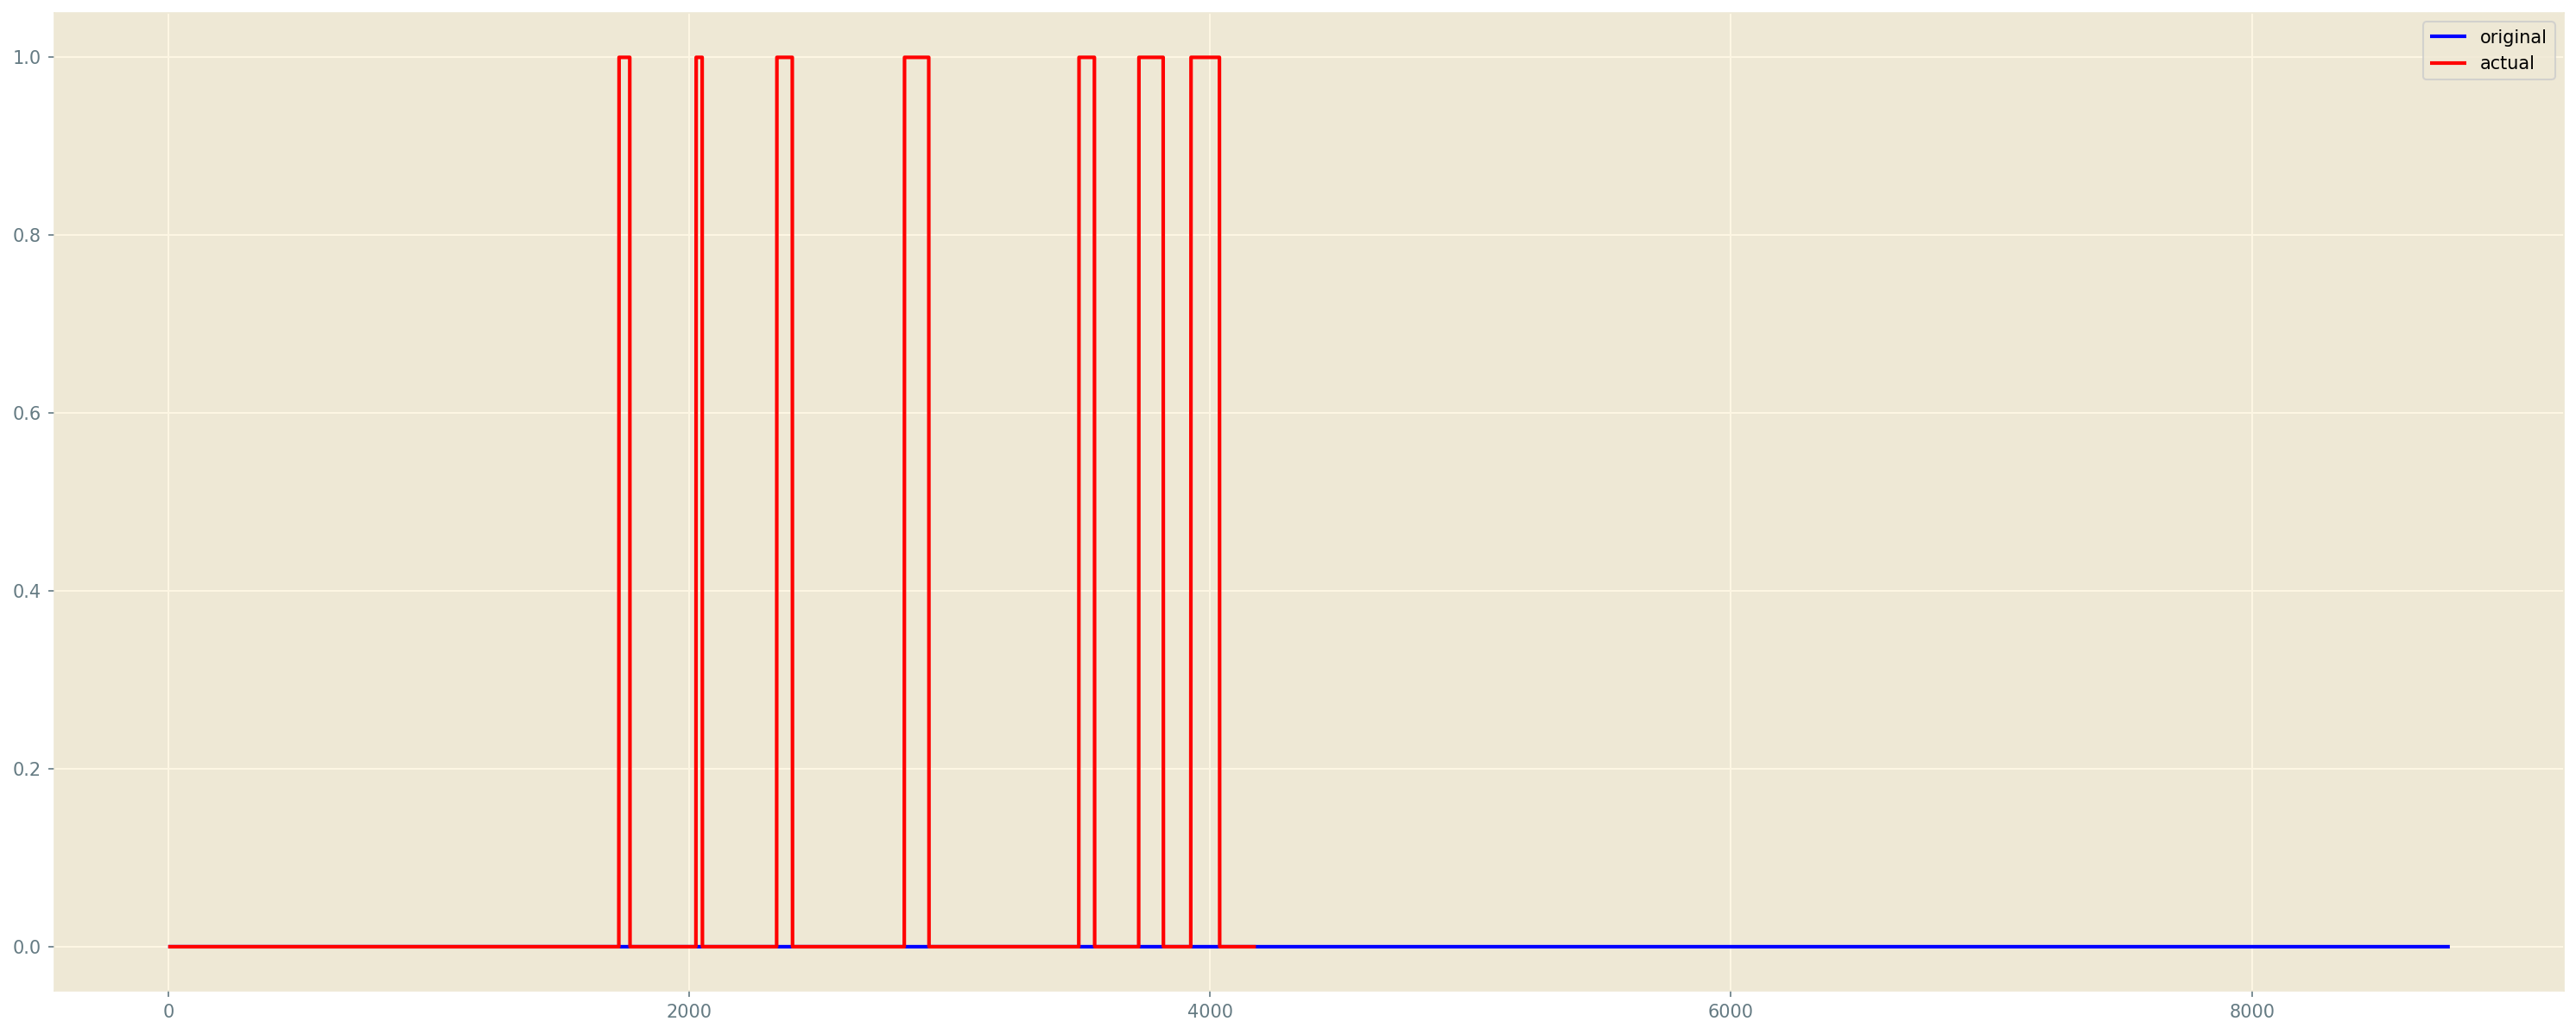

In [93]:
plt.figure(figsize=(25,10))
y1 = df["ATT_FLAG"].values
y = df_attacks[" ATT_FLAG"].values
y[y==-999] = 0
plt.plot(y1, color='b', label='original')
plt.plot(y, color='r', label='actual')
plt.legend()

#### 2.	Are the signals correlated? Do they show cyclic behavior?

If we make a heatmap we also see that some columns correlate heavily, also between the P\_J and F\_PU columns. For example, there is a strong negative correlation between F\_PU1 and P\_J269 and between F\_PU2 and P\_J280. There is a strong positive correlation between F\_PU4 and P\_J256 (among many others).

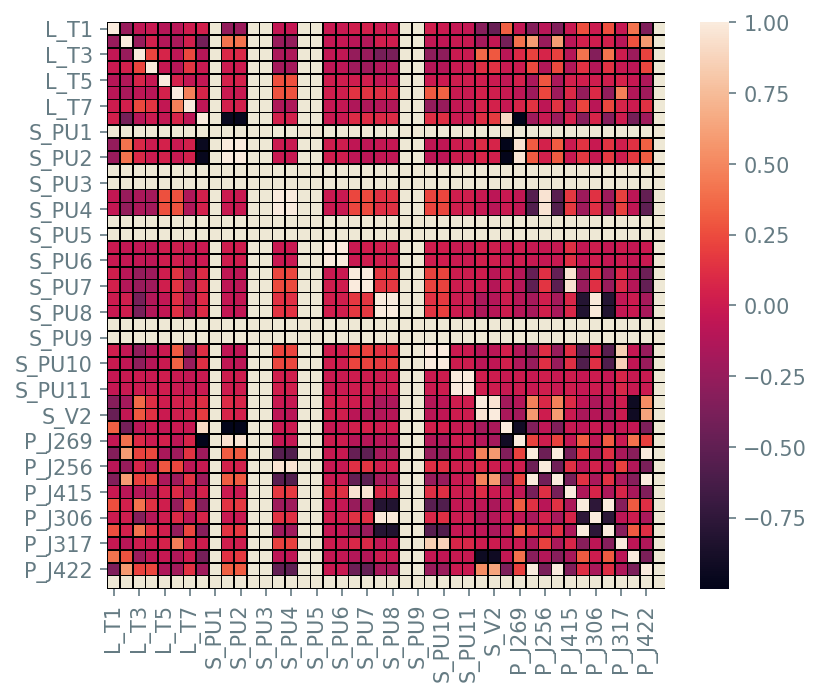

1    8761
Name: S_PU1, dtype: int64
0    8761
Name: F_PU3, dtype: int64
0    8761
Name: S_PU3, dtype: int64
0    8761
Name: F_PU5, dtype: int64
0    8761
Name: S_PU5, dtype: int64
0    8761
Name: F_PU9, dtype: int64
0    8761
Name: S_PU9, dtype: int64
0    8761
Name: ATT_FLAG, dtype: int64


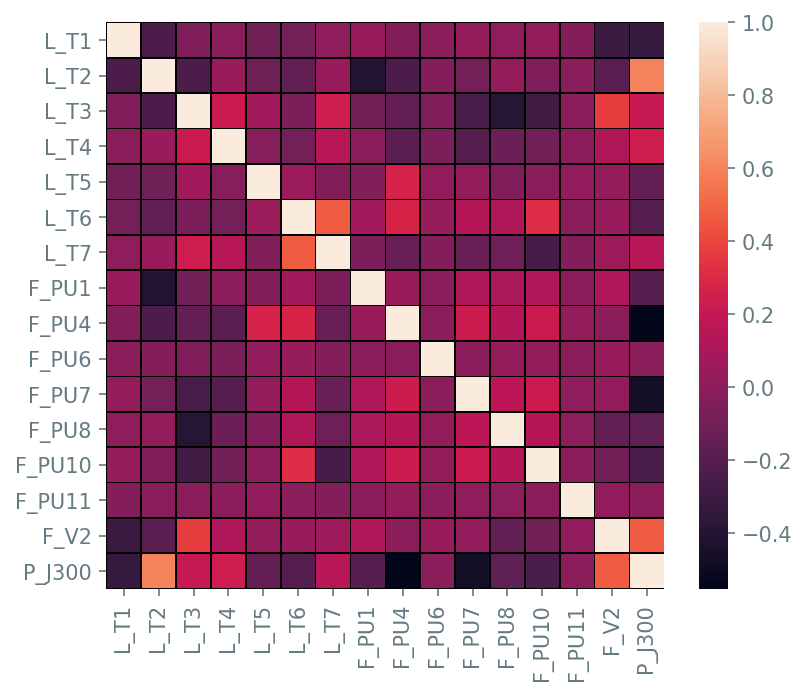

In [56]:
sns.heatmap(df.corr(), linewidths=0.3, linecolor='black')
values = df['F_PU1']
plt.show()

# Remove all columns with a perfect correlation: 
perfect_cor = ['S_PU1', 'F_PU3', 'S_PU3', 'F_PU5', 'S_PU5', 'F_PU9', 'S_PU9', 'ATT_FLAG']
# check all the removed columns on their data (they all contain exactly the same value everywhere so they can be removed)
final_columns = list(df.columns)
for col in perfect_cor:
    print(df[col].value_counts())
    final_columns.remove(col)

def trim_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

new_df = trim_correlated(df[final_columns], 0.8)
sns.heatmap(new_df.corr(), linewidths=0.3, linecolor='black')

If we take a few of the signals and plot them together, we see that many of them are cyclical, at least the F\_PU* signals and L\_T* move in regular intervals. The P\_J* signals seem to be less regular, although they still move up and down with a fairly steady period and amplitude. Additionaly, at least some of them are definitely correlating signals, like F\_PU1 and F\_PU2. 

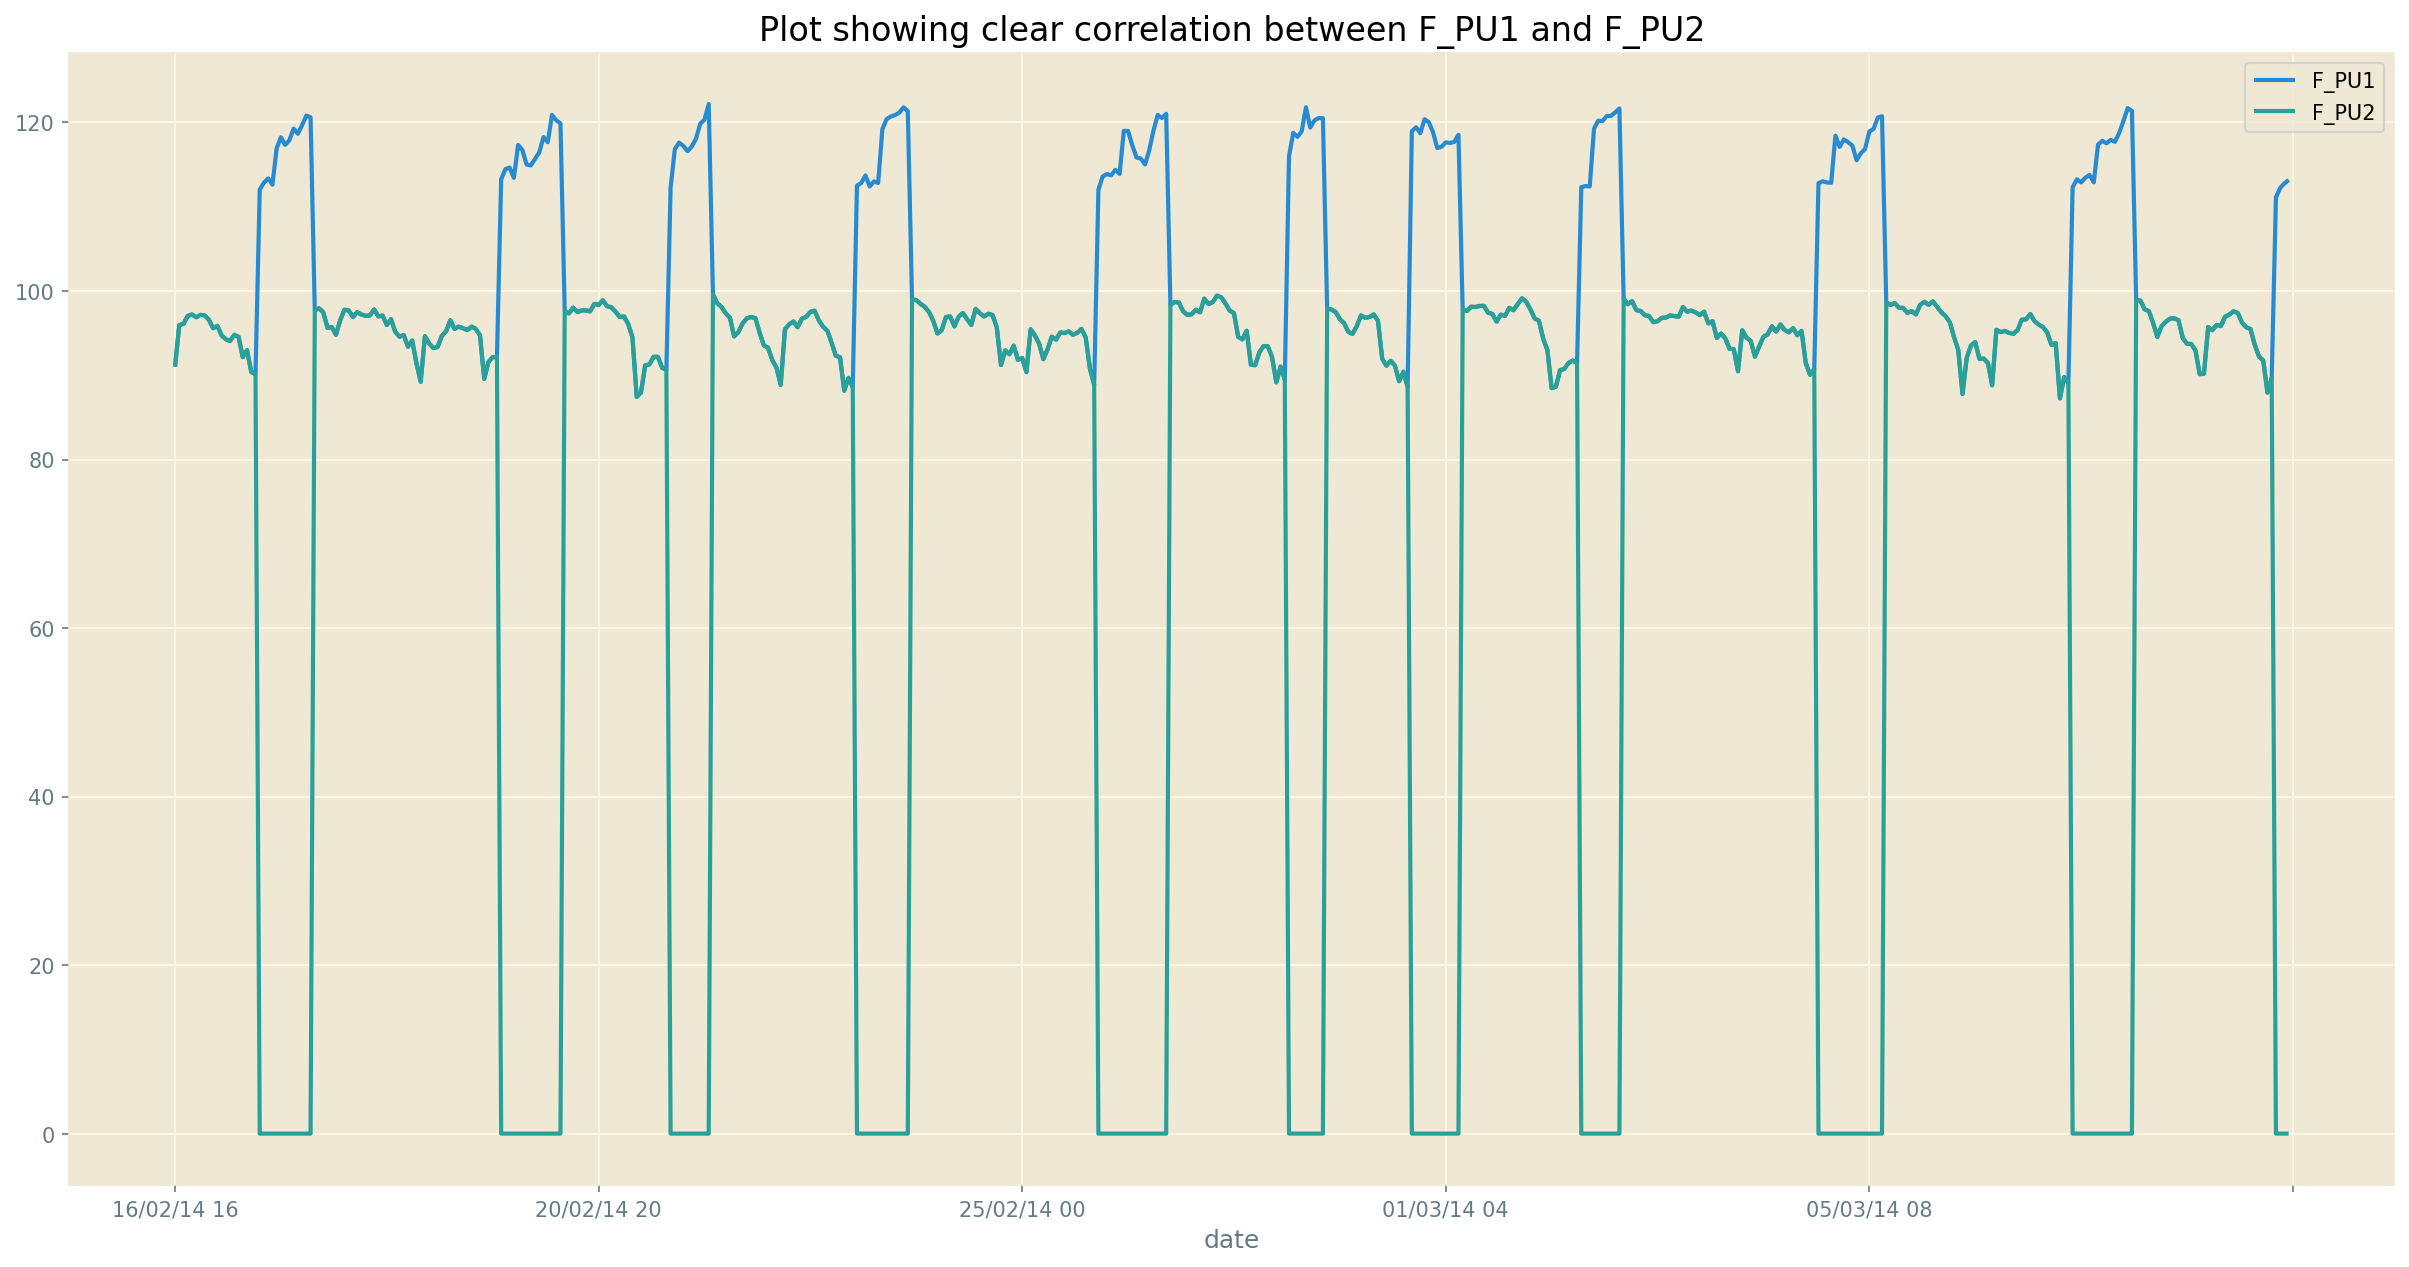

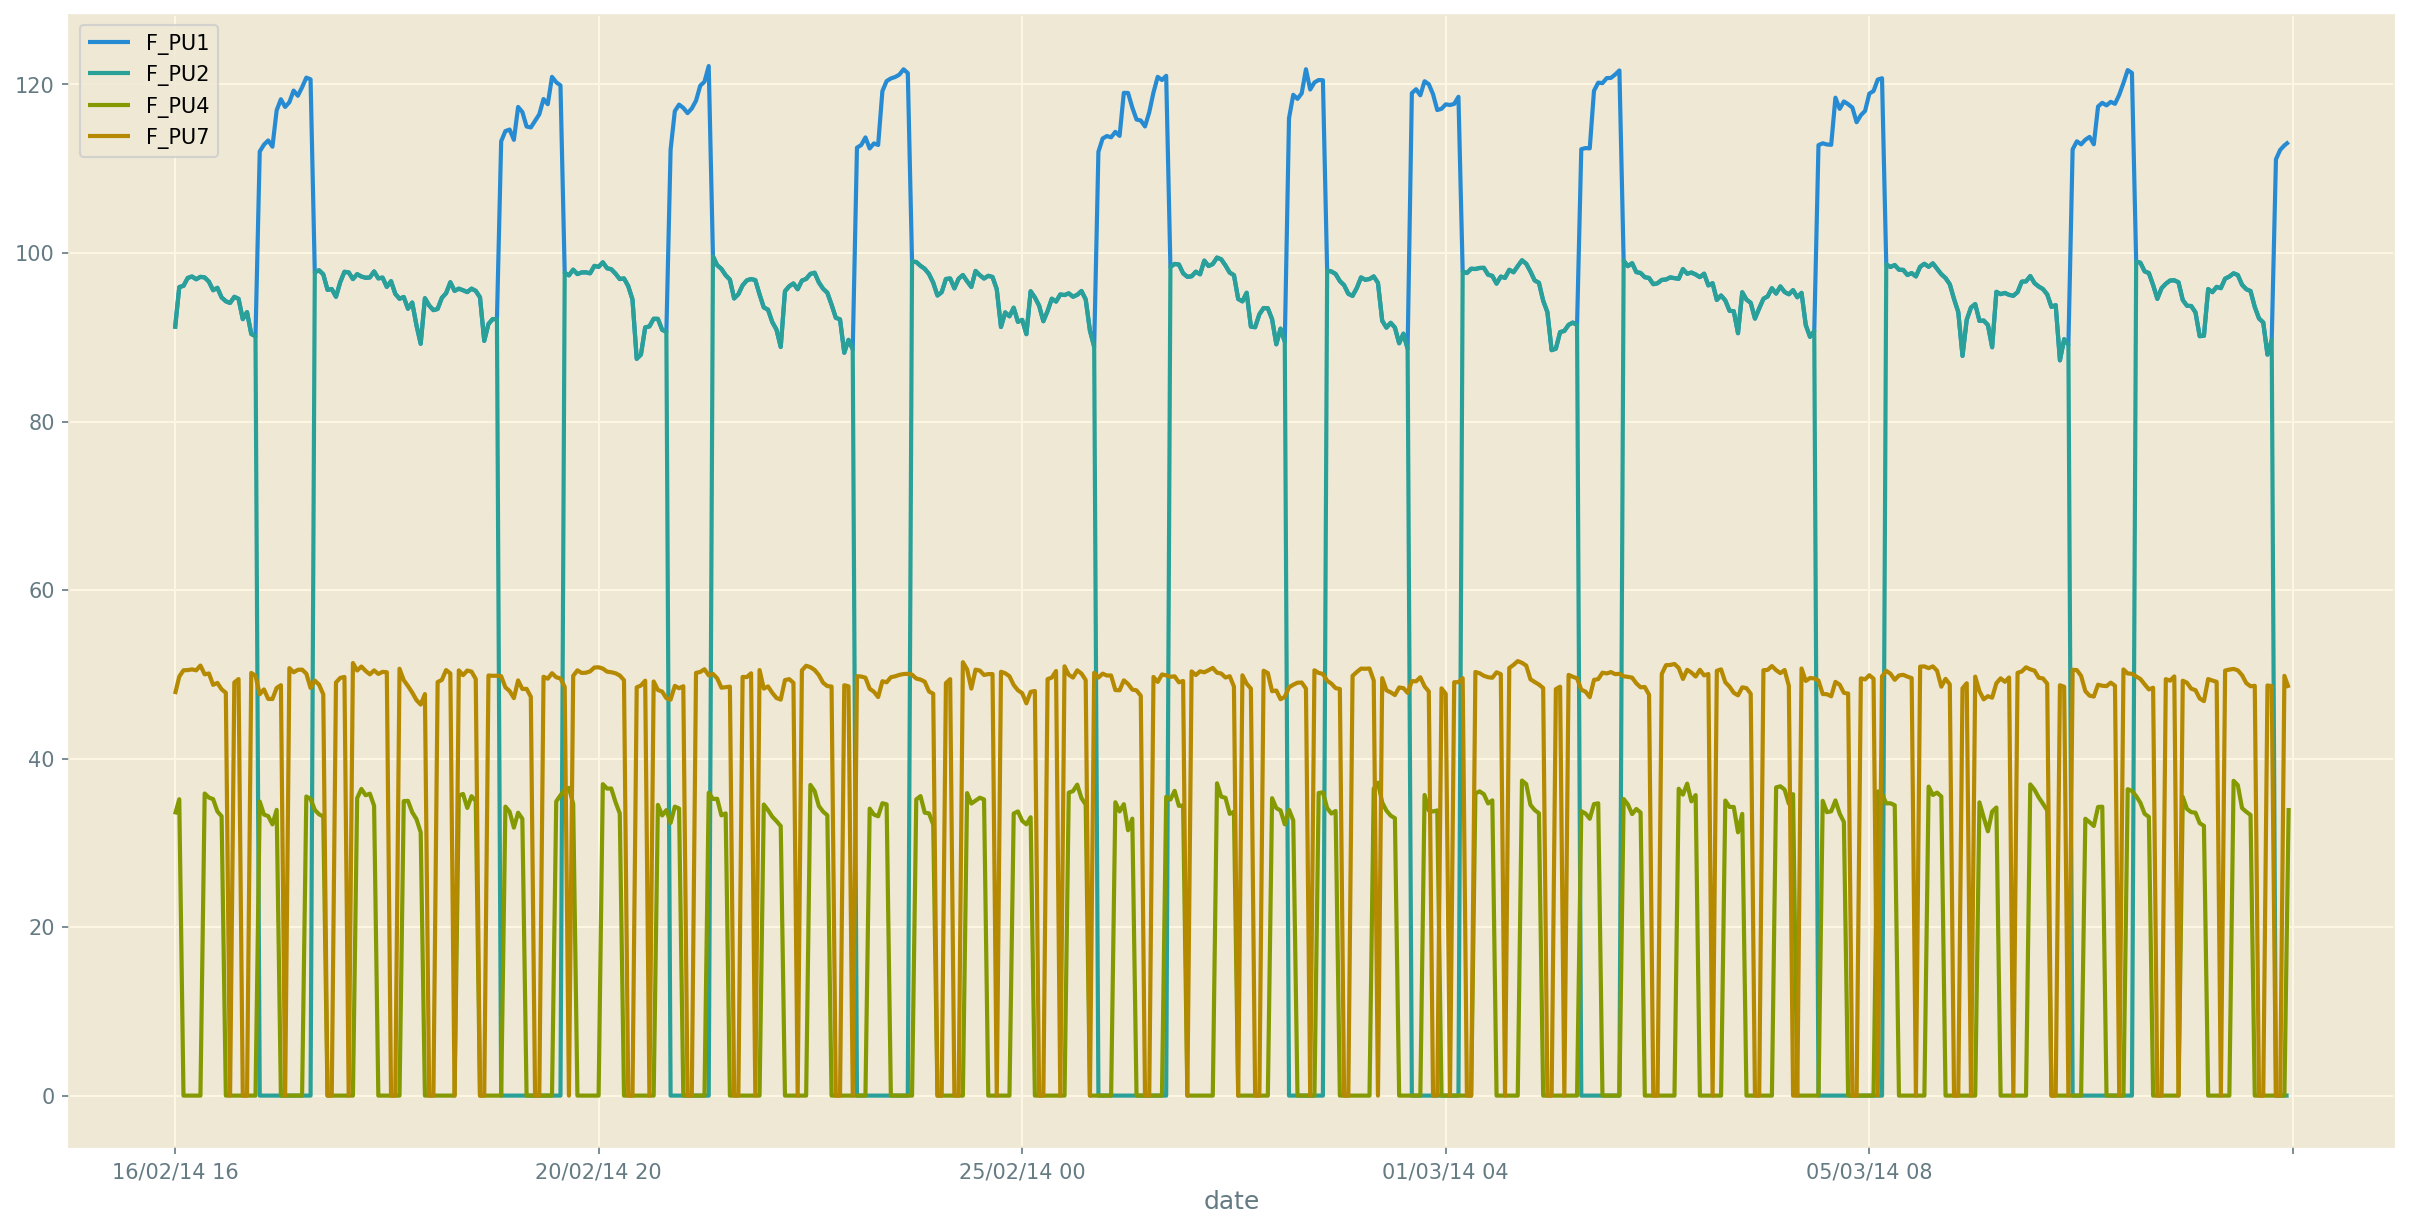

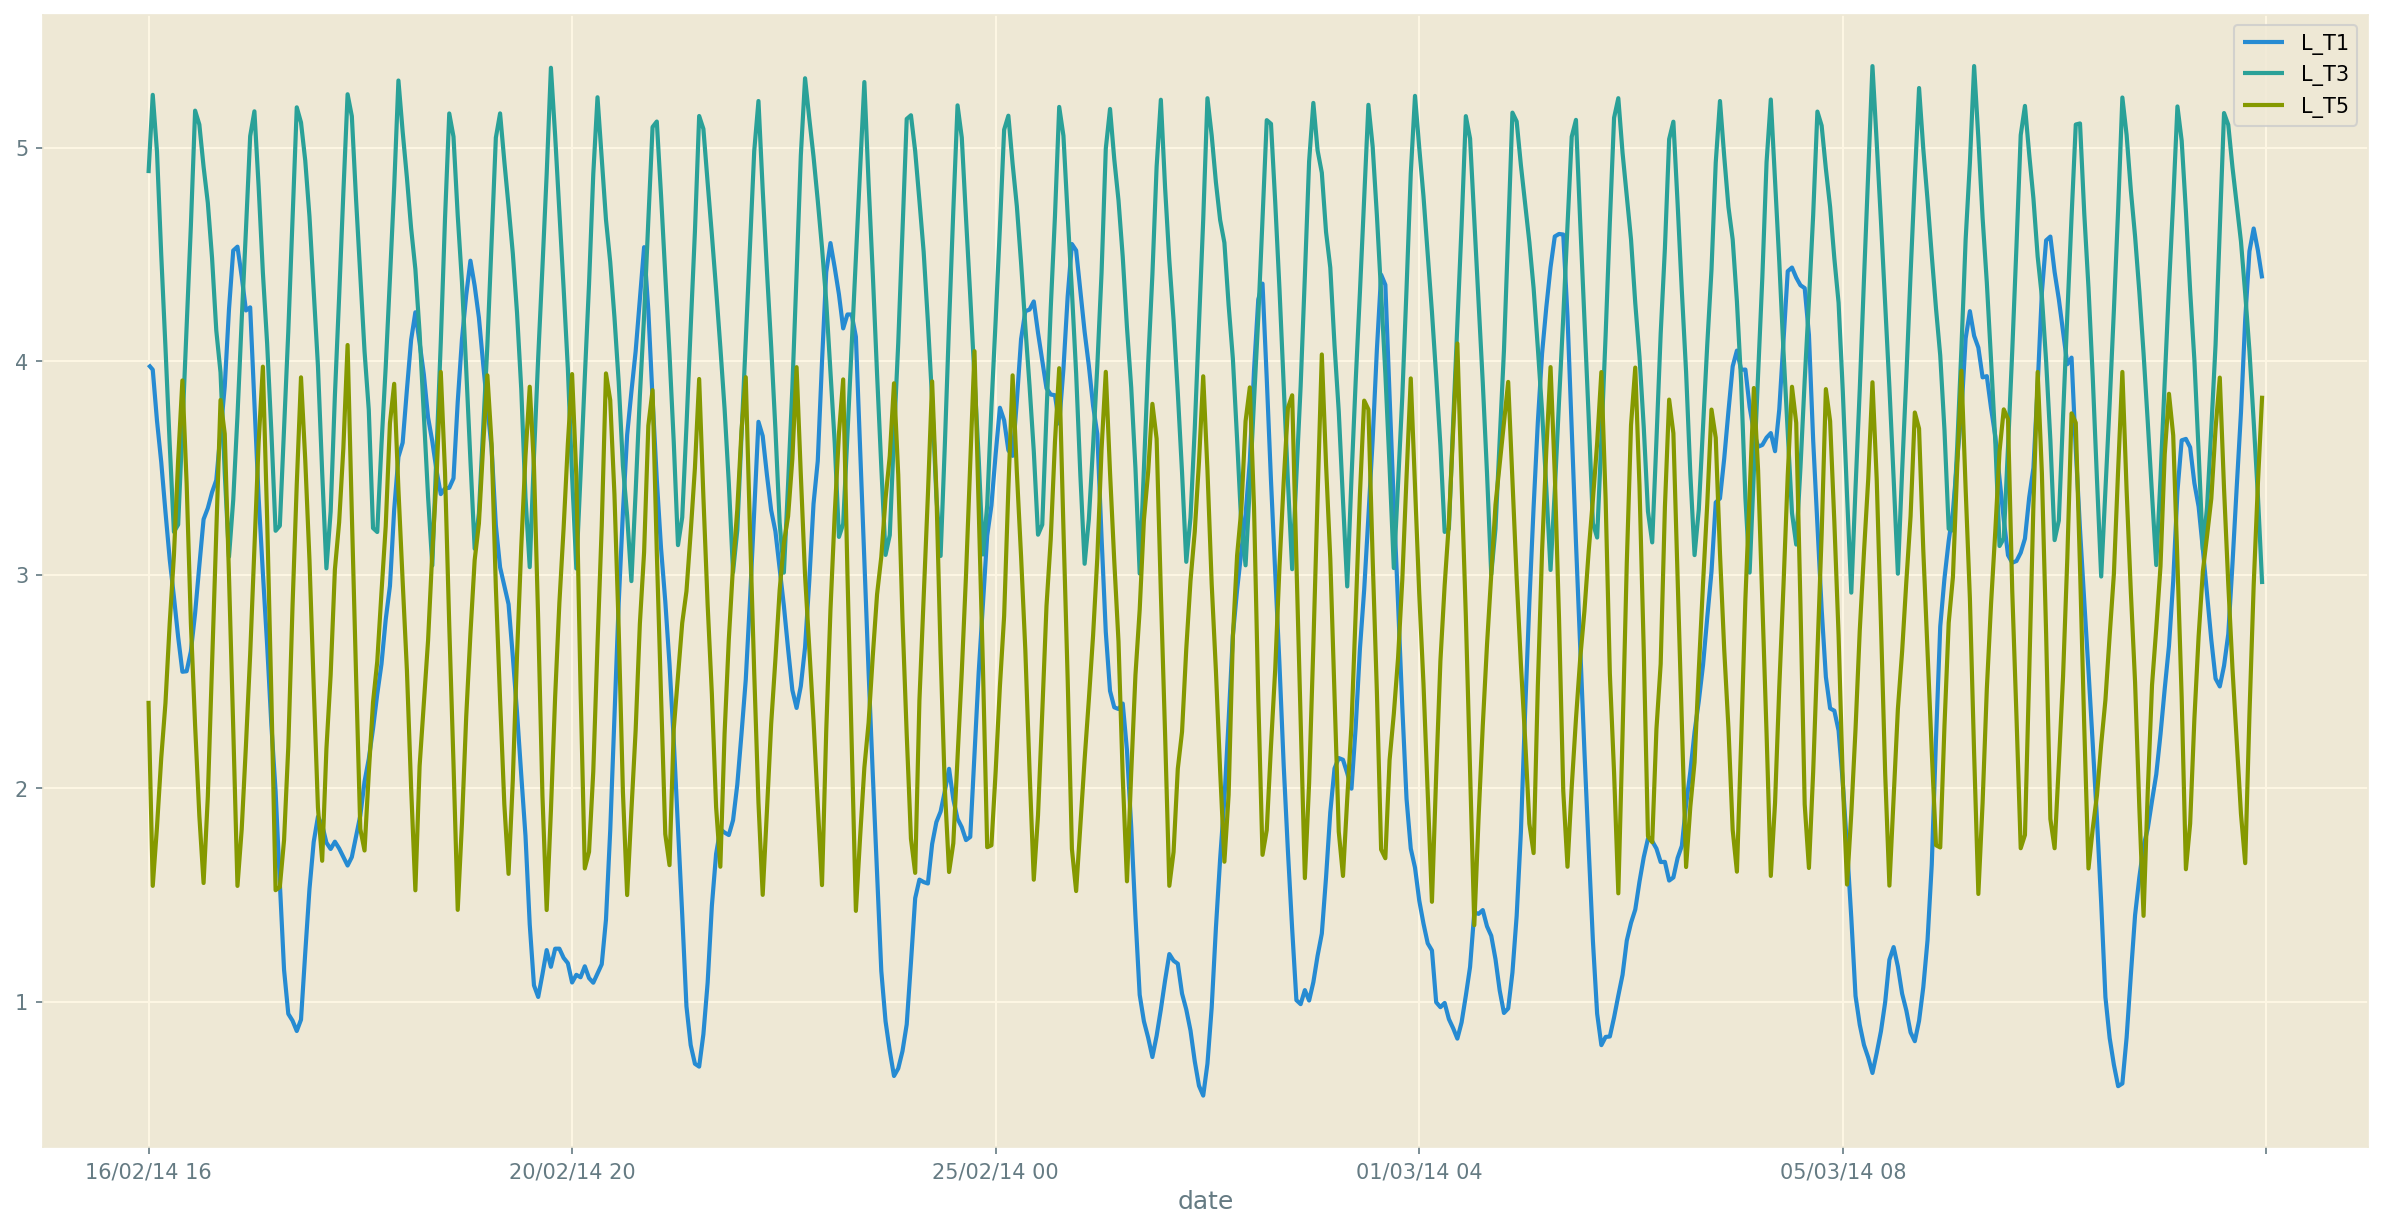

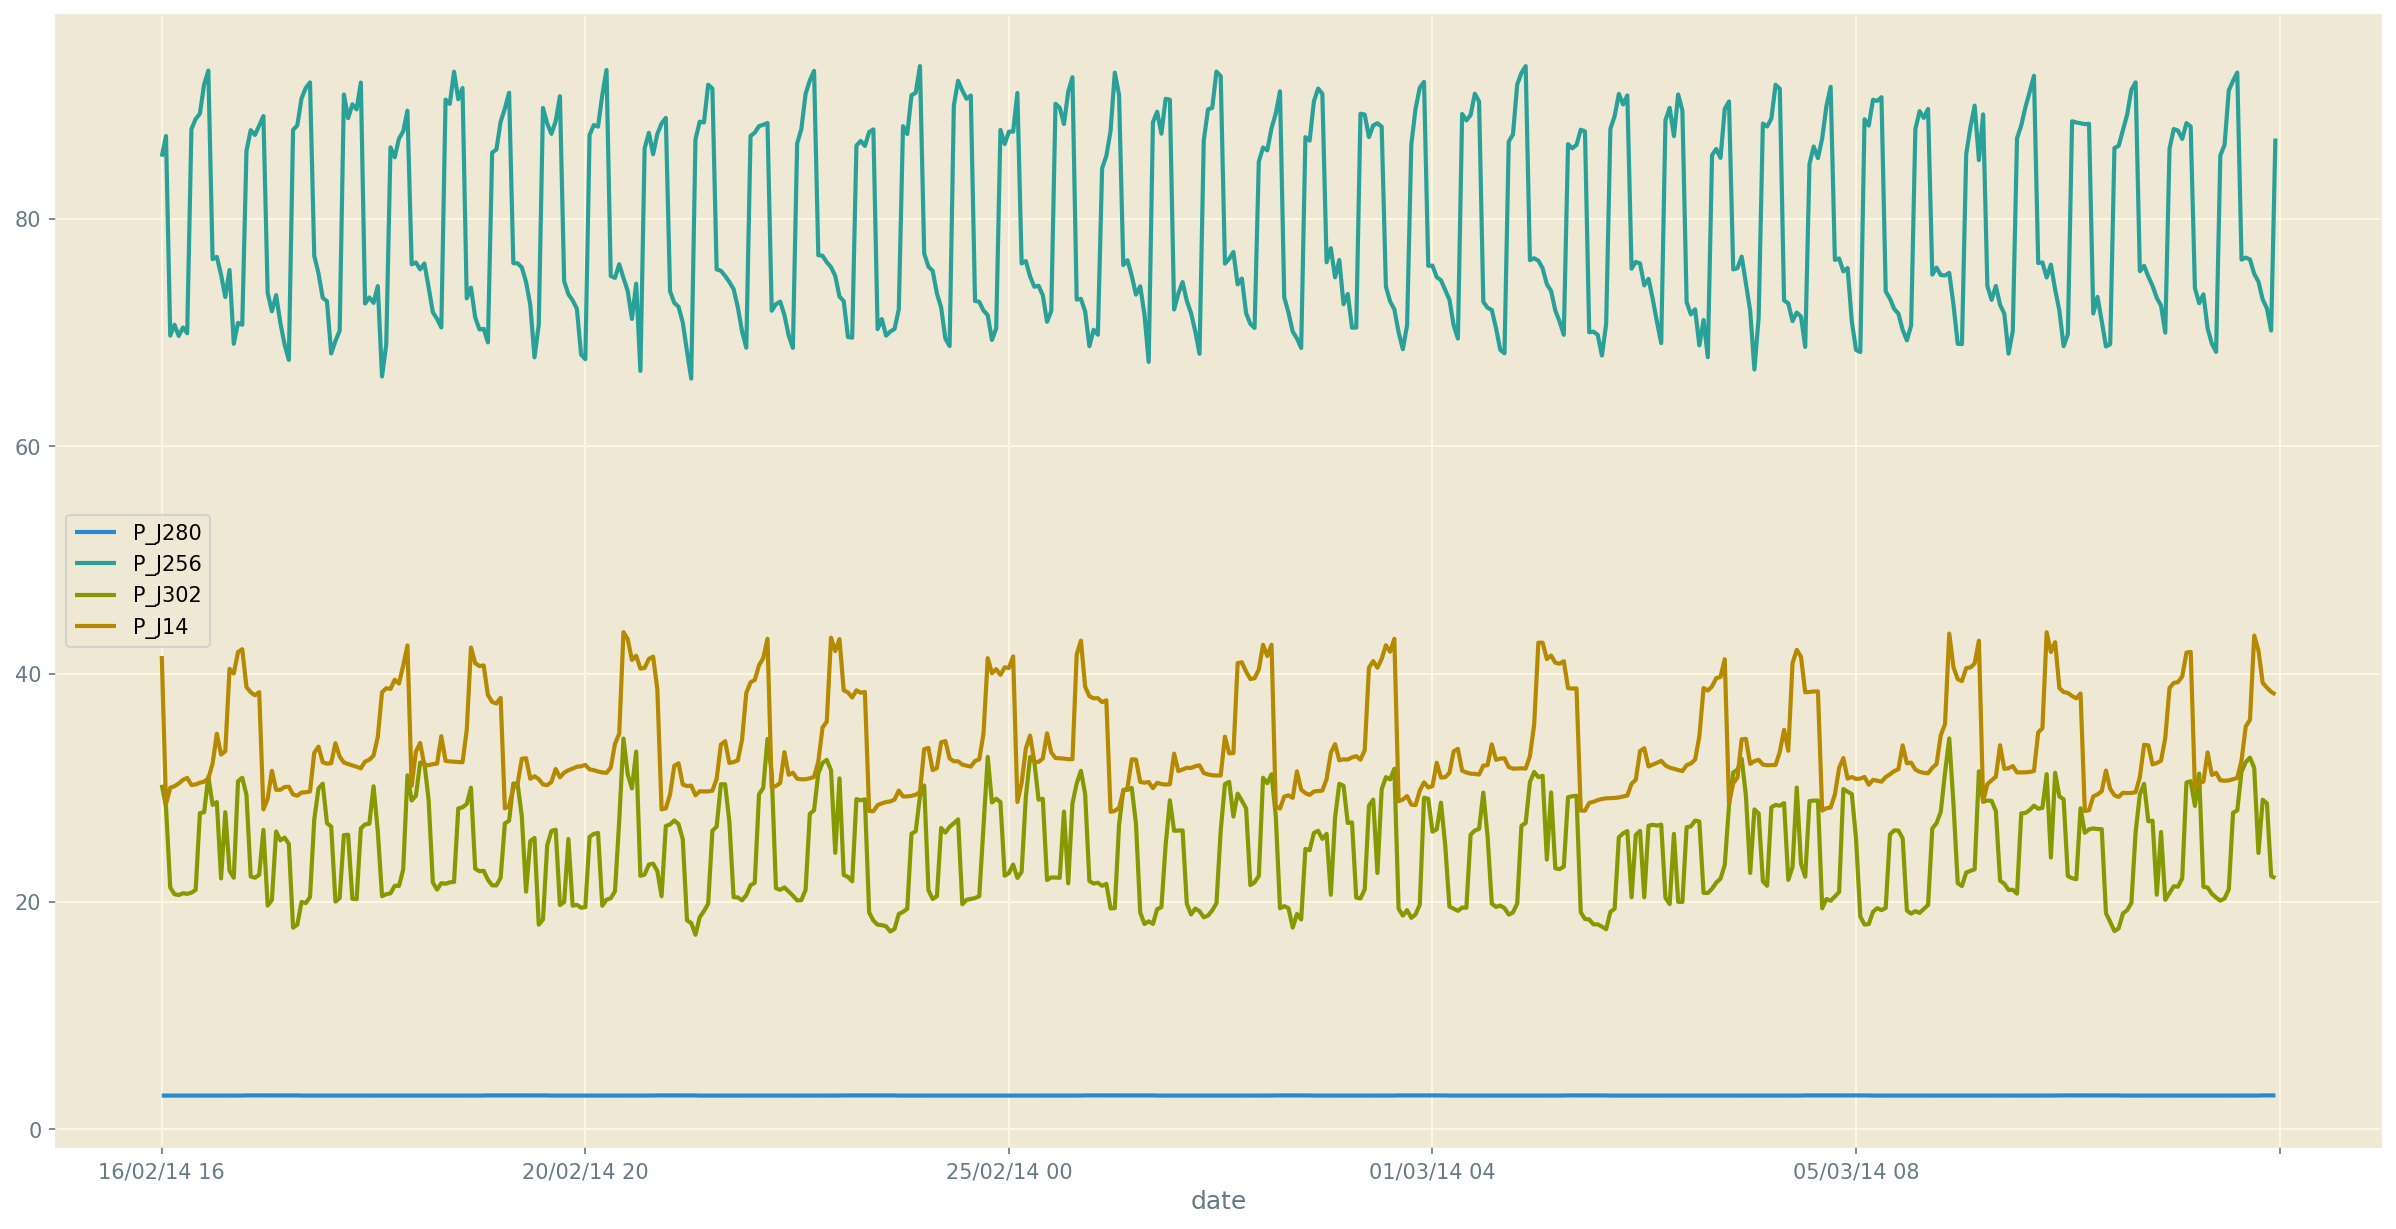

In [79]:
data_preproc_1_2 = pd.DataFrame({
    'date': df["DATETIME"],
    'F_PU1': df["F_PU1"],
    'F_PU2': df["F_PU2"]
})[1000:1500]
data_preproc = pd.DataFrame({
    'date': df["DATETIME"],
    'F_PU1': df["F_PU1"],
    'F_PU2': df["F_PU2"],
    'F_PU4': df["F_PU4"],
    'F_PU7': df["F_PU7"],
})[1000:1500]
data_preproc2 = pd.DataFrame({
    'date': df["DATETIME"],
    'L_T1': df["L_T1"],
    'L_T3': df["L_T3"],
    'L_T5': df["L_T5"],
})[1000:1500]
data_preproc3 = pd.DataFrame({
    'date': df["DATETIME"],
    'P_J280': df["P_J280"],
    'P_J256': df["P_J256"],
    'P_J302': df["P_J302"],
    'P_J14': df["P_J14"],
})[1000:1500]

data_preproc_1_2.plot(figsize=(20,10), x='date', title= "Plot showing clear correlation between F_PU1 and F_PU2")
data_preproc.plot(figsize=(20,10), x='date')
data_preproc2.plot(figsize=(20,10), x='date')
data_preproc3.plot(figsize=(20,10), x='date')


3.	Is predicting the next value in a series easy or hard? Use any method from class.

A Moving Average predictor was used to predict the series. A prediction is made by taking the average value of the last few points in the dataset as the prediction of the next value. For a window size of x the first x points are discarded, then point x + 1 is predicted by taking the mean of the x points. Then, point x+2 is predicted by taking the mean of x + 1, x and x - 1 (The actual value point x+1, not the predicted one from before).

Using this we predict the values of 3 randomly selected sensors: $F\_PU1, P\_J14, L\_T1$.
The resulting mean square error for windows sizes 1 upto 4 is printed in the code. For F_PU1 and P_J14 the predictions are not that accurate. For L_T1 the predictions are very accurate as can be seen by the low mean squared error, we also show a plot of the predictions so you can see how close they get.

Finally we conclude that the usage of smalle windows is better than that of larger windows. This might come in handy when performing n-grams.

F_PU1 window 1, MSE: 22.52876800505293
F_PU1 window 2, MSE: 28.054642990271294
F_PU1 window 3, MSE: 34.441194194645675
F_PU1 window 4, MSE: 41.02657818596487
P_J14 window 1, MSE: 7.821453635668086
P_J14 window 2, MSE: 9.26305419702651
P_J14 window 3, MSE: 10.744100250175576
P_J14 window 4, MSE: 12.222990868593714
L_T1 window 1, MSE: 0.05540482503213124
L_T1 window 2, MSE: 0.11655654640697702
L_T1 window 3, MSE: 0.1946729437494204
L_T1 window 4, MSE: 0.2860703968441422

Plots of L_T1


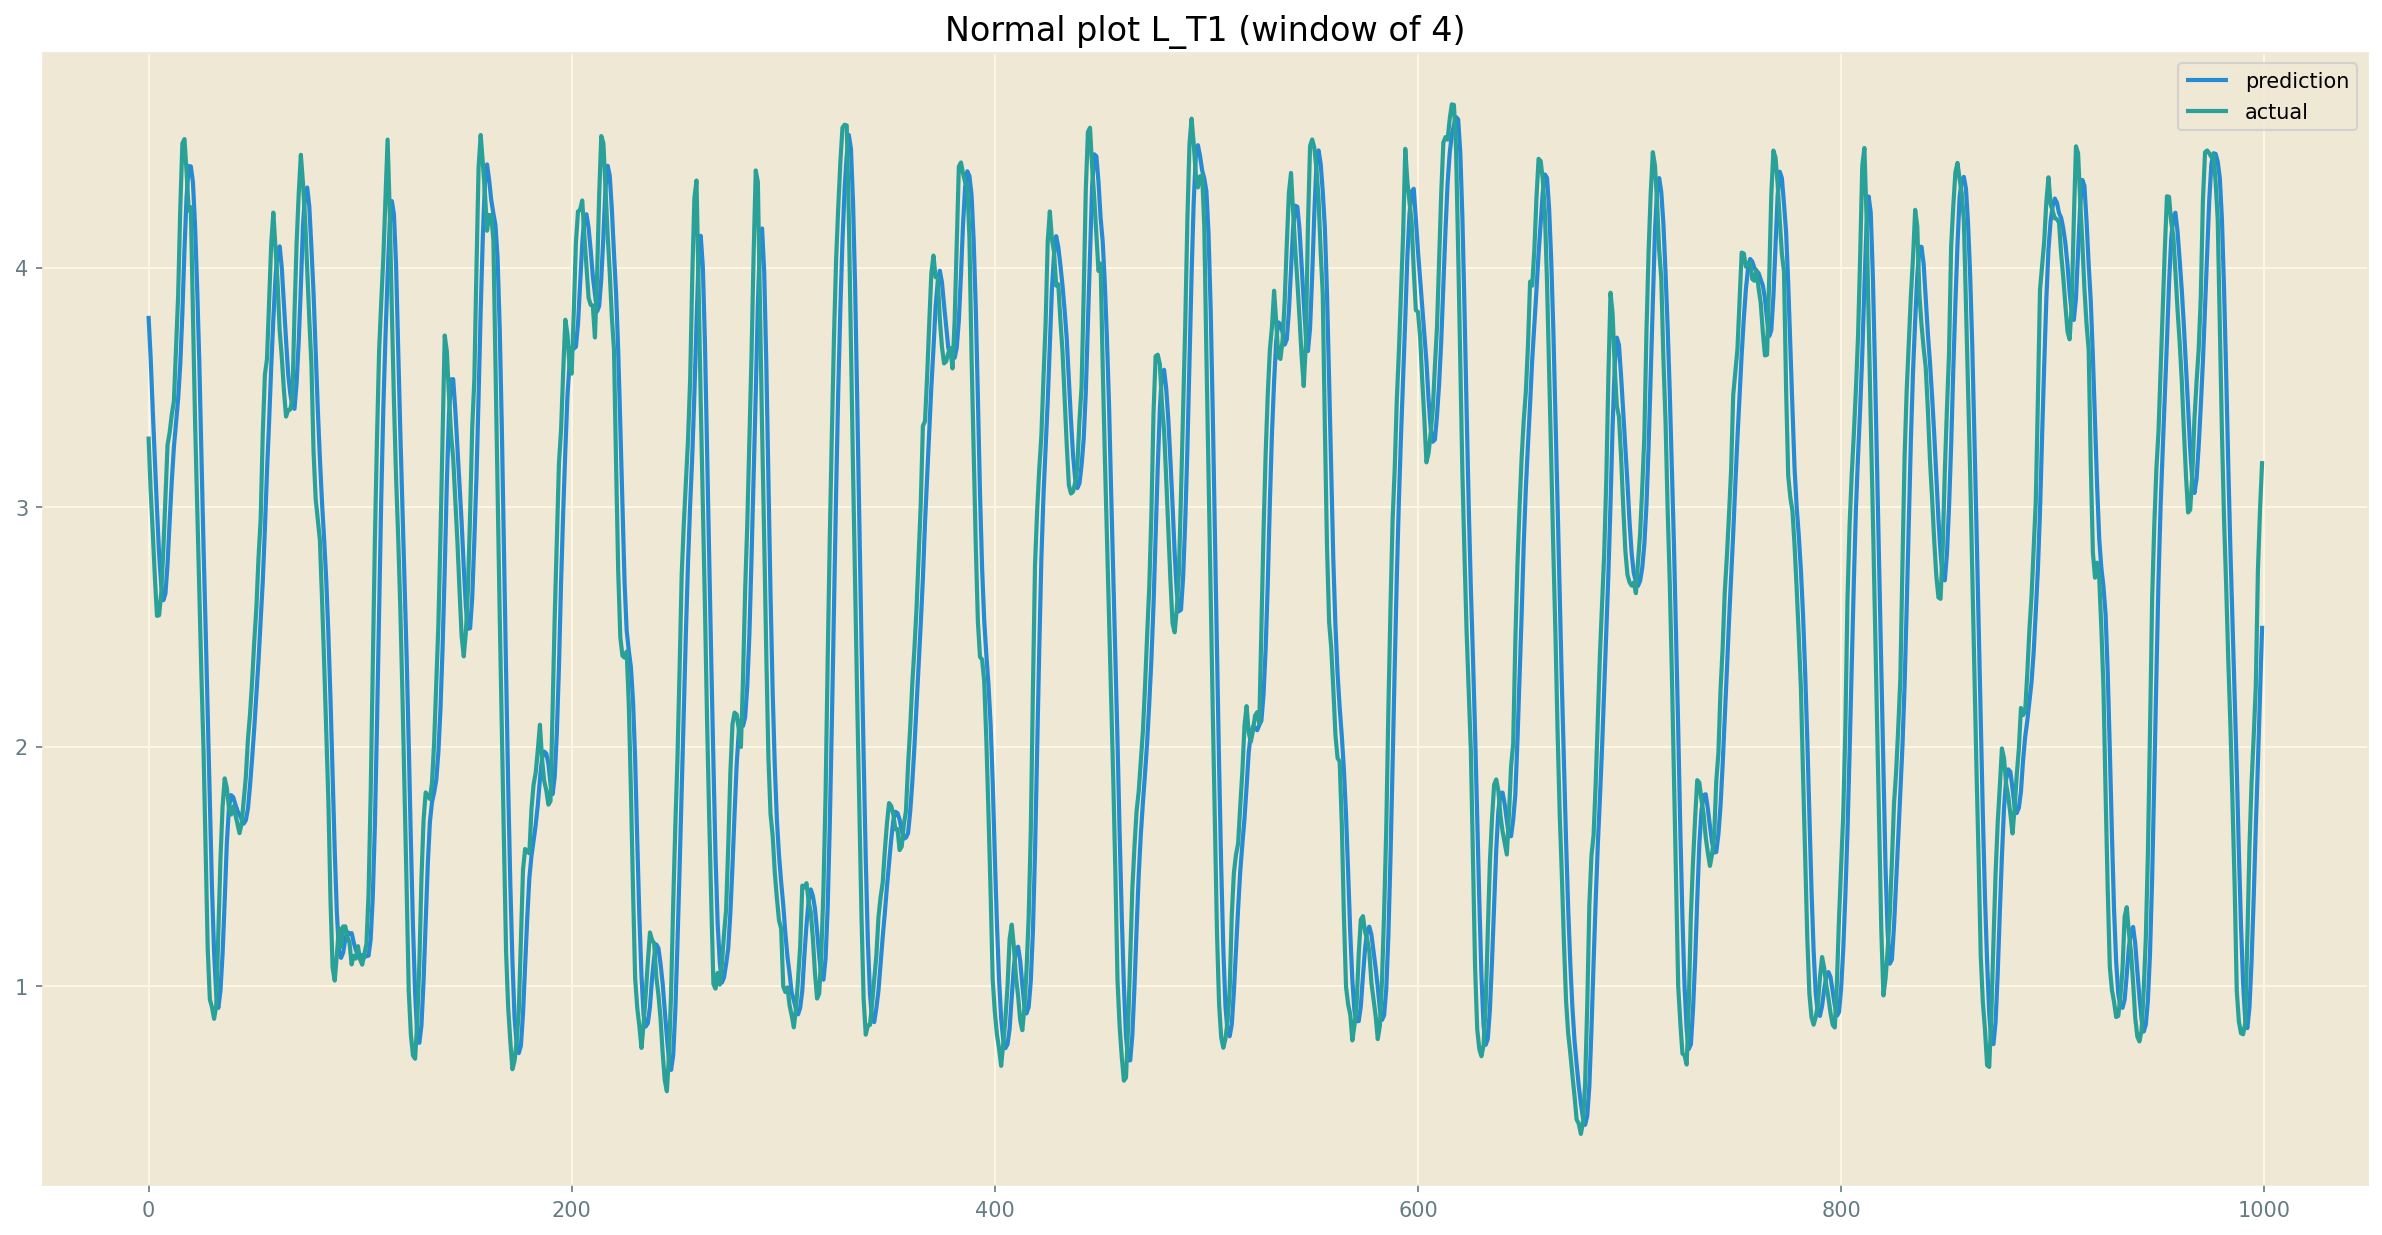

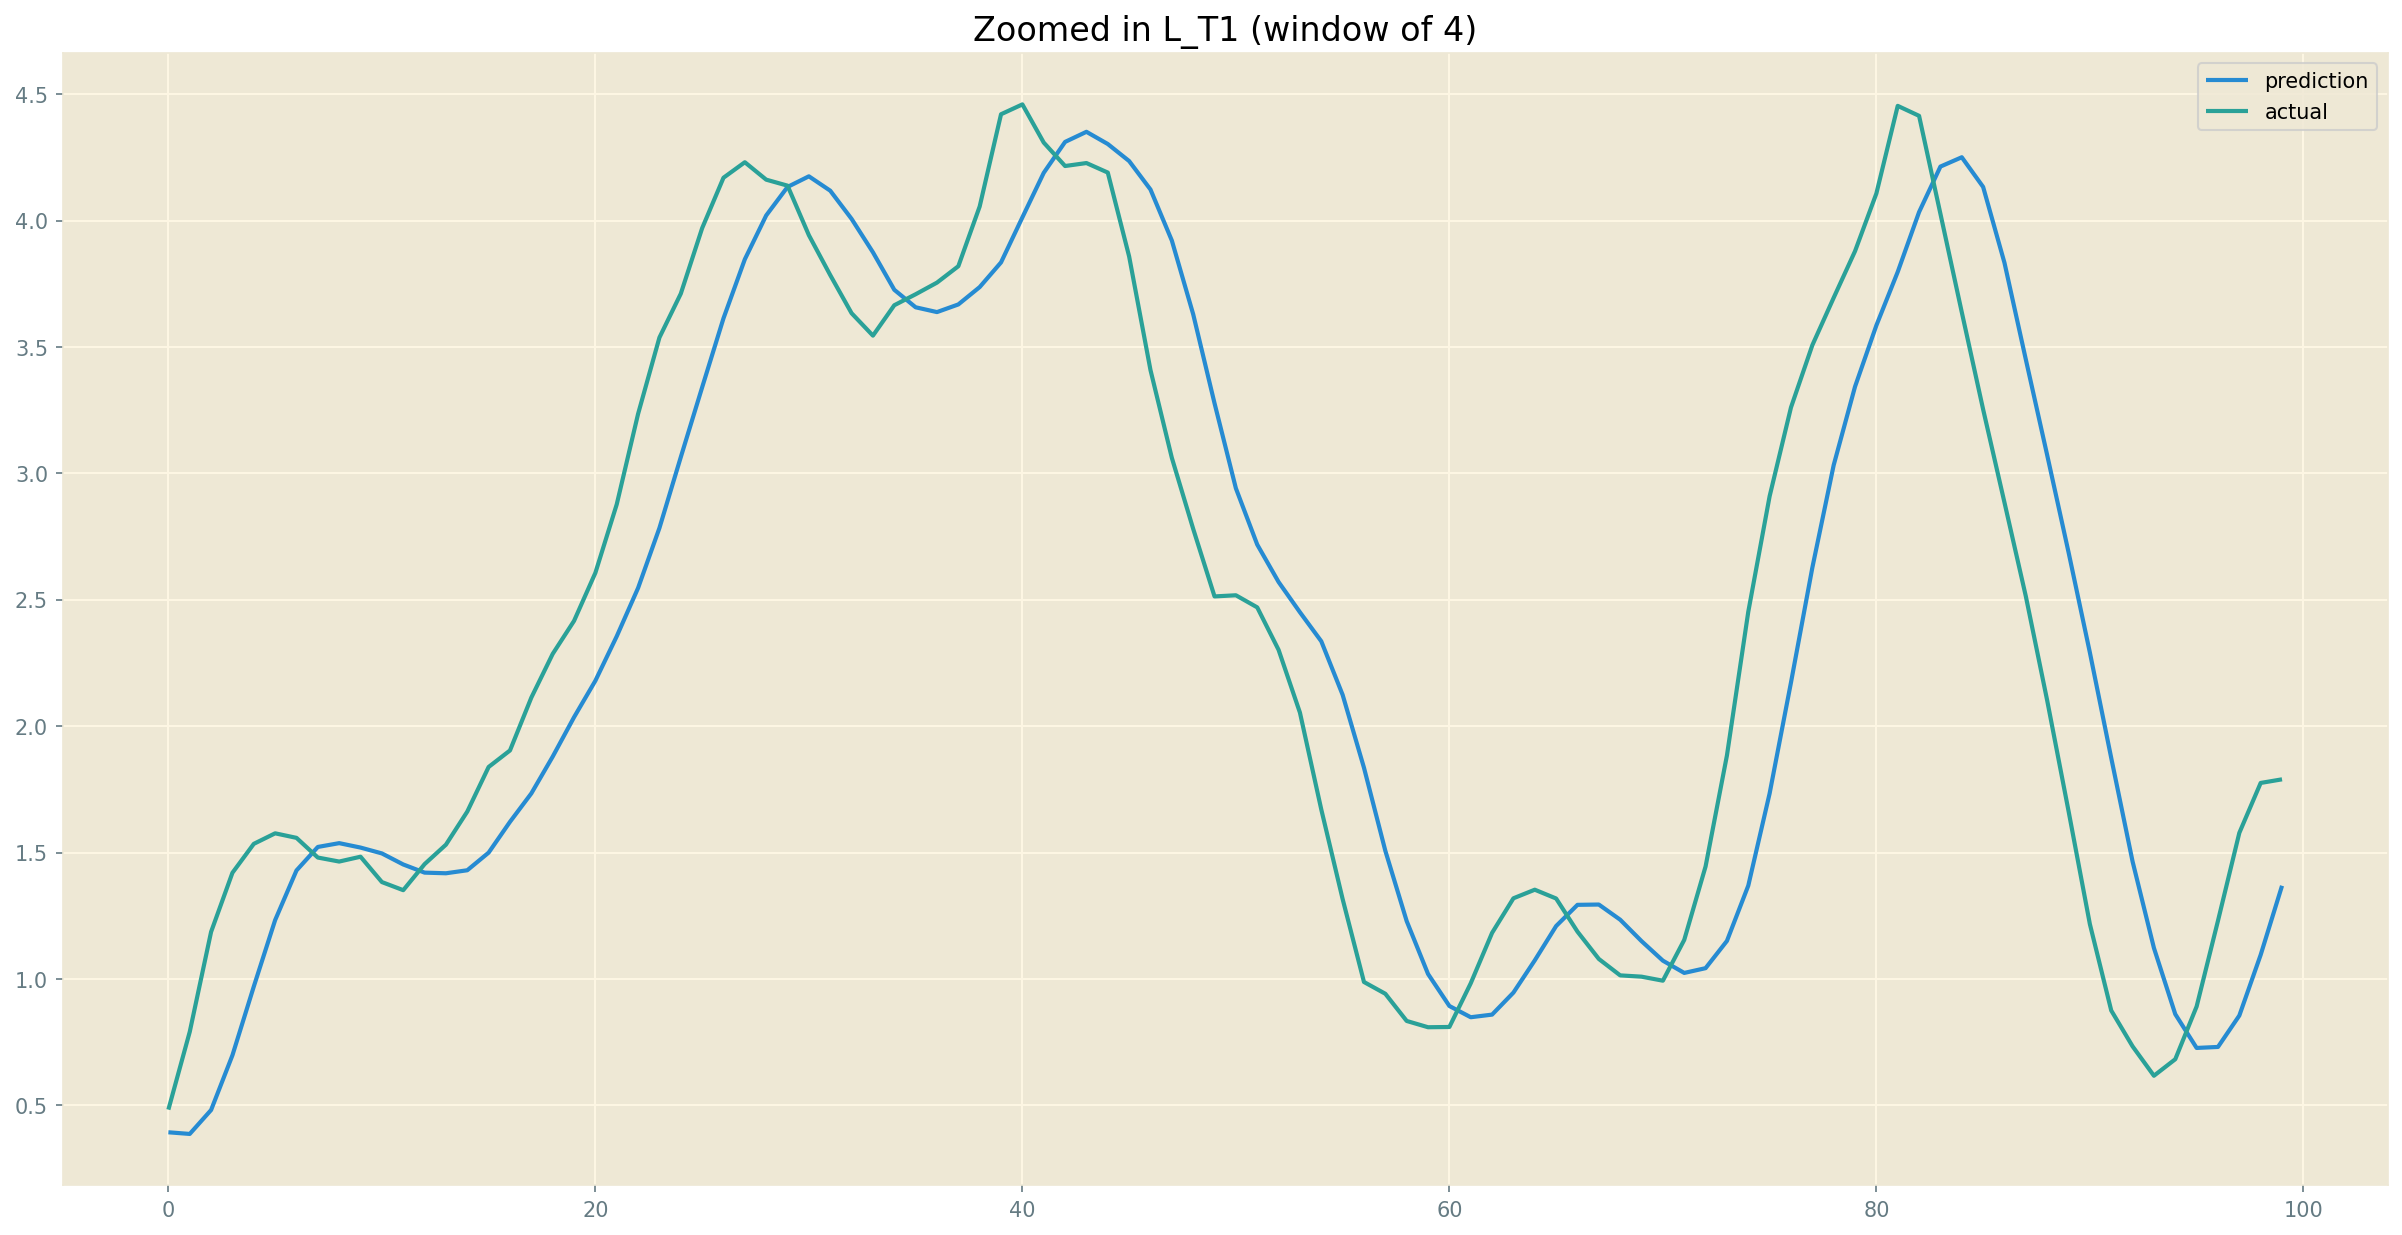

In [78]:
from numpy import mean
from sklearn.metrics import mean_squared_error

def moving_average_prediction(data, window = 3):
    test = [data[i] for i in range(window, len(data))]
    predictions = []
    
    current_prediction = window
    for t in range(len(test)):
        predicted_value = mean([data[i] for i in range(current_prediction-window,current_prediction)])
        predictions.append(predicted_value)
        current_prediction += 1
    # 	print('predicted=%f, expected=%f' % (yhat, obs))
    
    error = mean_squared_error(test, predictions)
#     print('Test MSE: %.3f' % error)
    return test, predictions, error

data, predictions, error = moving_average_prediction(df['F_PU1'].values, 1)
print(f'F_PU1 window 1, MSE: {error}')
data, predictions, error = moving_average_prediction(df['F_PU1'].values, 2)
print(f'F_PU1 window 2, MSE: {error}')
data, predictions, error = moving_average_prediction(df['F_PU1'].values, 3)
print(f'F_PU1 window 3, MSE: {error}')
data, predictions, error = moving_average_prediction(df['F_PU1'].values, 4)
print(f'F_PU1 window 4, MSE: {error}')

data, predictions, error = moving_average_prediction(df['P_J14'].values, 1)
print(f'P_J14 window 1, MSE: {error}')
data, predictions, error = moving_average_prediction(df['P_J14'].values, 2)
print(f'P_J14 window 2, MSE: {error}')
data, predictions, error = moving_average_prediction(df['P_J14'].values, 3)
print(f'P_J14 window 3, MSE: {error}')
data, predictions, error = moving_average_prediction(df['P_J14'].values, 4)
print(f'P_J14 window 4, MSE: {error}')

data, predictions, error = moving_average_prediction(df['L_T1'].values, 1)
print(f'L_T1 window 1, MSE: {error}')
data, predictions, error = moving_average_prediction(df['L_T1'].values, 2)
print(f'L_T1 window 2, MSE: {error}')
data, predictions, error = moving_average_prediction(df['L_T1'].values, 3)
print(f'L_T1 window 3, MSE: {error}')
data, predictions, error = moving_average_prediction(df['L_T1'].values, 4)
print(f'L_T1 window 4, MSE: {error}')

print("\nPlots of L_T1")
# plots
pd.DataFrame({"prediction":predictions[1000:2000],
            "actual": data[1000:2000]}).plot(figsize=(20,10), title='Normal plot L_T1 (window of 4)')
# zoom plot
pd.DataFrame({"prediction":predictions[:100],
            "actual": data[:100]}).plot(figsize=(20,10), title='Zoomed in L_T1 (window of 4)')


<a id='2'></a>

## 2. LOF task – 1/2 A4 – Individual
Perform LOF - based anomaly detection on the signal multivariate data points (do not take sequential context into account), use a distance of your choice. Plot the LOF scores on the training data 1 as a signal for several numbers of neighbors. Select a number to use and justify this choice using the obtained LOF scores and detected anomalies. Do you see large abnormalities in the training data? Can you explain why these occur? It is best to remove such abnormalities from the training data since you only want to model normal behavior. Describe the kind of anomalies you can de tect using LOF 

In [97]:
#Normalizing function
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
def normalize(df):
    df_normalized = df.copy()
    df_normalized = df_normalized

    normalize = TimeSeriesScalerMeanVariance(mu=0, std=1)
    for col in df:
        df_normalized[col] = normalize.fit_transform(df_normalized[col])[0]

    return df_normalized

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
normalize = StandardScaler()

#Normalizing the data before applying LOF and dropping the Datetime column
X = df.drop(["ATT_FLAG","DATETIME"],axis=1)
X_test = df_attacks.drop([" ATT_FLAG","DATETIME"],axis=1)
n_data = normalize.fit_transform(X)
#n_data = normalize(X)
test_data = normalize.fit_transform(X_test)
#test_data = normalize(X_test)
y_true = df_attacks[" ATT_FLAG"].to_numpy()

#plotting the error in anomaly detection Vs different number of neighbors
X_scores=np.empty((95,8761))
count = np.zeros(95)
error = np.zeros(95)
# fit the model 
plt.figure(figsize=[25,5])
#x1 = fig.add_subplot(211)
#t.xlabel("Data")
#lt.ylabel("Negative Outlier Scores")
for j in range(1,95):
    clf = LocalOutlierFactor(n_neighbors=j,novelty='true')
    clf.fit(n_data)
    y_pred = clf.predict(test_data)
    X_scores[j] = clf.negative_outlier_factor_
    for i in range(len(X_scores[j])):
        if(X_scores[j][i] < -1):
               count[j]+=1
    #print('count',count[j])
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] =1
    #print(y_pred)
    #print(y_true)
    #t.plot(X_scores[j],label = j,ax=ax1)
    for k in range(len(y_pred)):
        if(y_pred[k] != y_true[k]):
            error[j]+=1
    #print('Error',error[j])
plt.legend(loc= 'upper right')
plt.xlabel("Num")
plt.ylabel("Error")
plt.plot(error)
plt.legend(loc= 'upper right')

NameError: name 'StandardScaler' is not defined

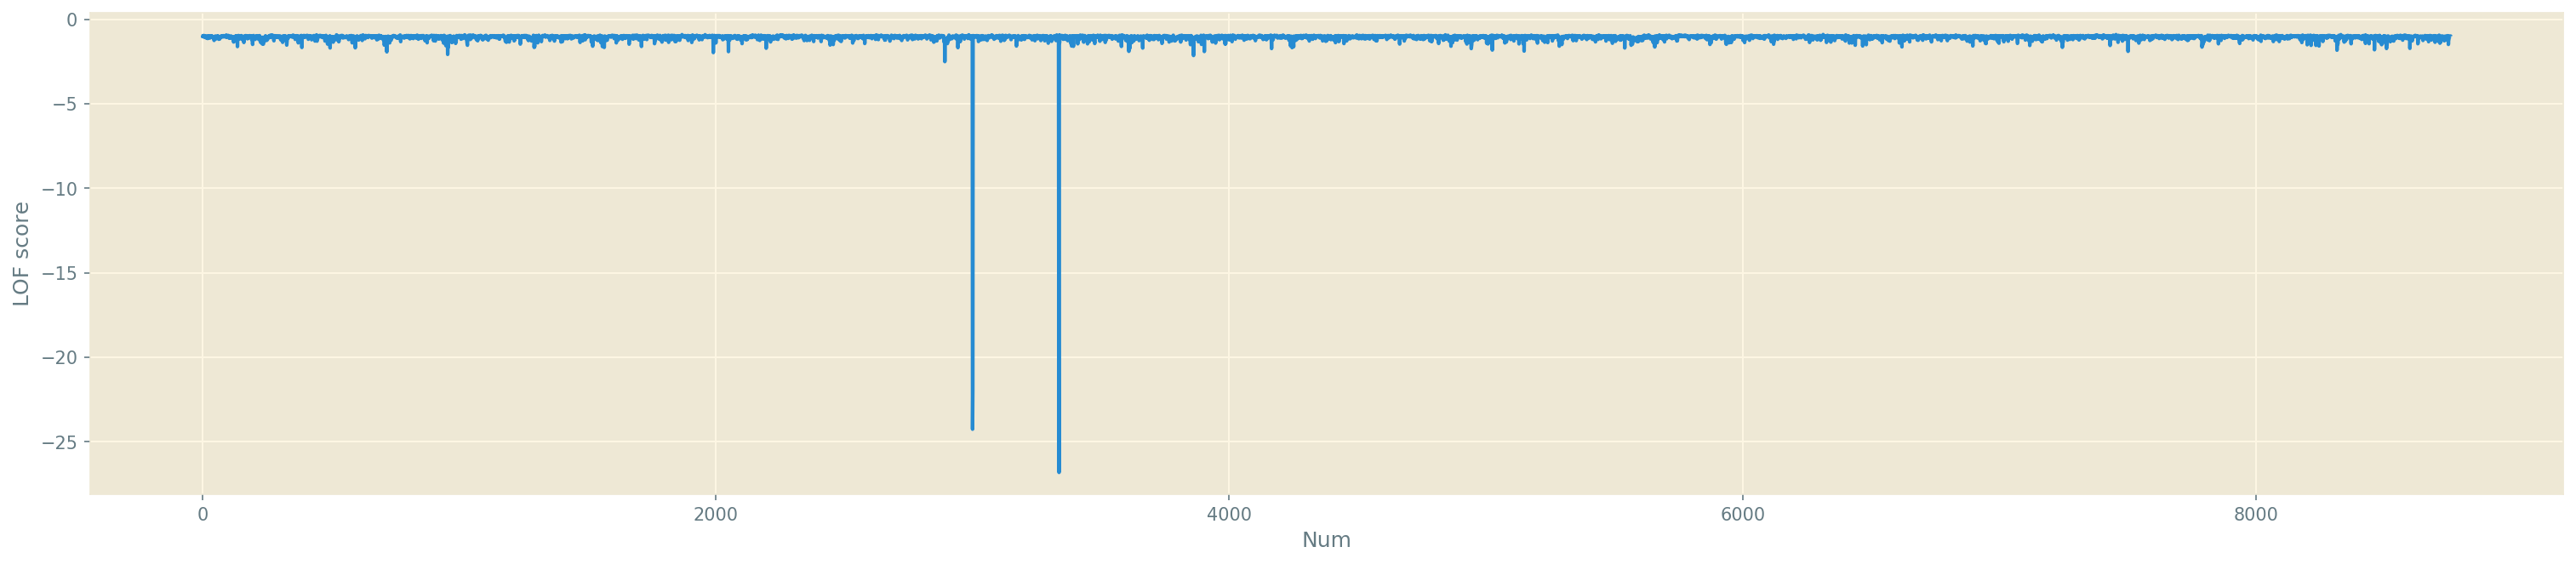

In [10]:
# LOF score on training data with no anomalies
clf = LocalOutlierFactor(n_neighbors=5)
clf.fit(n_data)
X_new_scores = clf.negative_outlier_factor_
plt.figure(figsize=[25,5])
plt.xlabel("Num")
plt.ylabel("LOF score")
plt.plot(X_new_scores)

In [11]:
clf = LocalOutlierFactor(n_neighbors=5)
clf.fit(n_data)
y_pred = clf.fit_predict(test_data)
errors=0
X_scores = clf.negative_outlier_factor_
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] =1
tn=0
fp=0
tp=0
fn=0
for k in range(len(y_pred)):
        if(y_pred[k] == y_true[k]):
            if(y_pred[k] == 1):
                tp+=1
            else:
                tn+=1
        else:
            if(y_pred[k] == 1):
                fp+=1
            else:
                fn+=1
acc=100.0*(tp+tn)/(tp+tn+fp+fn)
if (tp+fp)!=0:
    prec= 100.0 *tp / (tp + fp)
else:
    prec=0
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")

TP: 56
FP: 37
TN: 3648
FN: 436
Accuracy: 88.6760833133828
Precision: 60.215053763440864


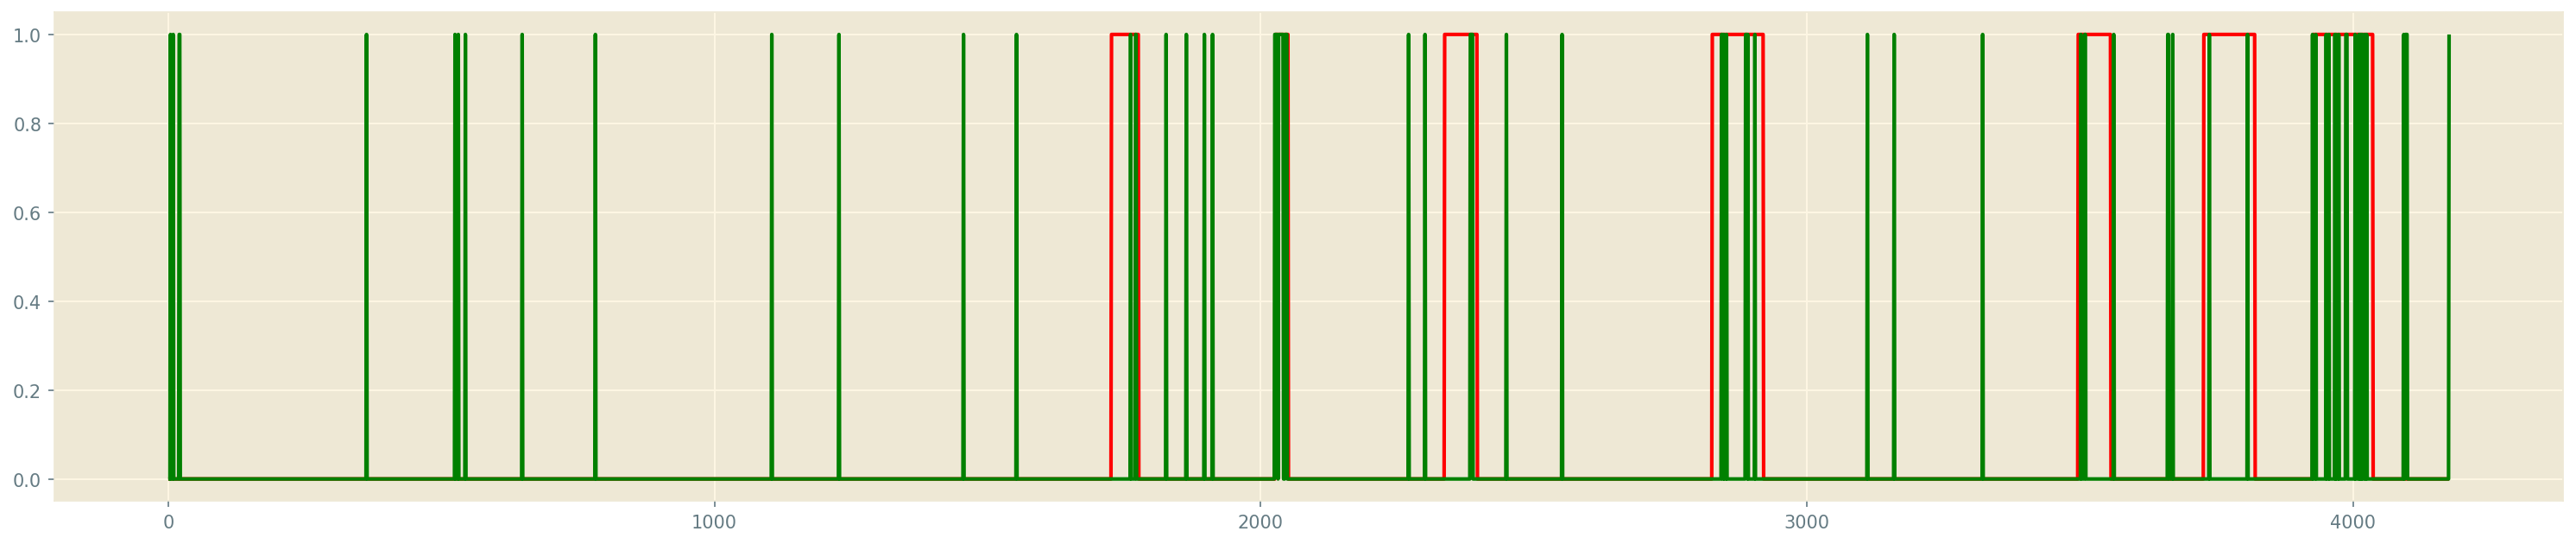

In [12]:
plt.figure(figsize=[25,5])
plt.plot(y_true,'r')
plt.plot(y_pred,'g')

In [13]:
#Removal of abnormal values from the training data
X = df.drop(["ATT_FLAG","DATETIME"],axis=1)
c=0
for index in range(len(X_new_scores)):
        if (X_new_scores[index] < -1.3):
            c+=1
            X = X.drop([index],axis=0)
print(c)
n_data = normalize.fit_transform(X)

313


In [14]:
#Calculating error on cleaned up data
clf = LocalOutlierFactor(n_neighbors=5,novelty='true')
clf.fit(n_data)
y_pred = clf.predict(test_data)
errors=0
X_scores = clf.negative_outlier_factor_
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] =1
tn=0
fp=0
tp=0
fn=0
for k in range(len(y_pred)):
        if(y_pred[k] == y_true[k]):
            if(y_pred[k] == 1):
                tp+=1
            else:
                tn+=1
        else:
            if(y_pred[k] == 1):
                fp+=1
            else:
                fn+=1
acc=100.0*(tp+tn)/(tp+tn+fp+fn)
if (tp+fp)!=0:
    prec= 100.0 *tp / (tp + fp)
else:
    prec=0
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")


TP: 253
FP: 123
TN: 3562
FN: 239
Accuracy: 91.33349293751496
Precision: 67.2872340425532


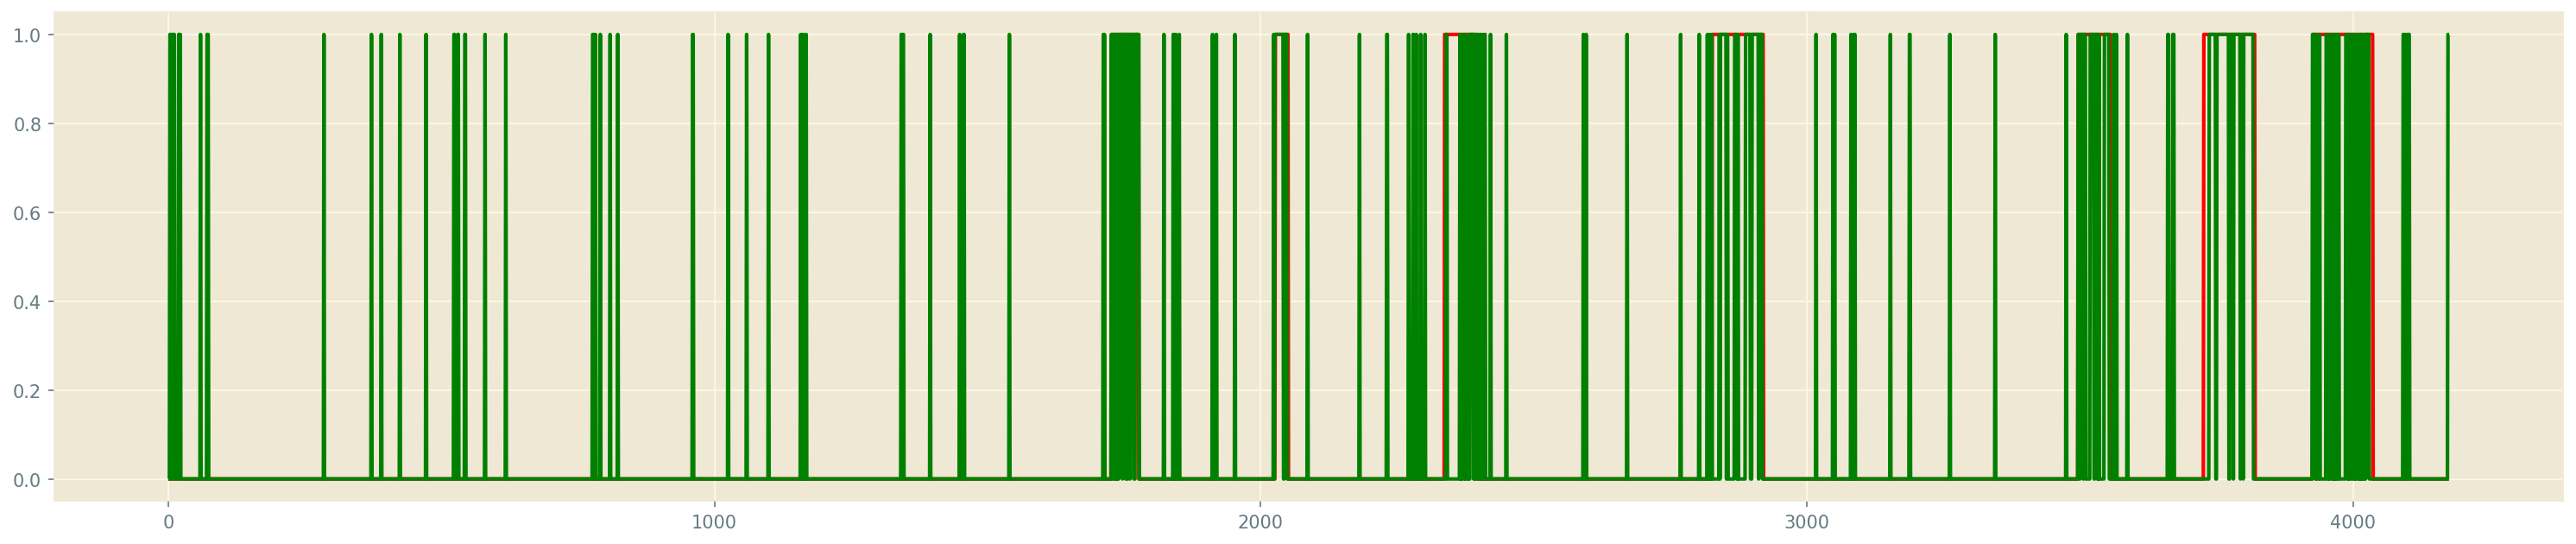

In [15]:
plt.figure(figsize=[25,5])
plt.plot(y_true,'r')
plt.plot(y_pred,'g')


<a id='2a'></a>

### 2a. Plot LOF scores


<a id='2b'></a>

### 2b. Analysis and answers to the questions


<a id='3'></a>

## 3. PCA task – 1/2 A4 – Individual
Perform PCA - based anomaly detection on the signal multivariate data points (do not take sequential context into account). Plot the PCA residuals for different number of components on training data 1 in one signal. Choose the number of components based on the residuals and detected anomalies. 
<!-- Step 1: normalize -->
In order to do PCA analysis we first need to do some pre processing. 
In order for PCA to work correctly the data needs to be normalized so that it has a mean of zero and unit-variance, such that each feature will be weighted equally in our calculations. This is done using the "tslearn" package.

In [144]:
# Preprocessing
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.decomposition import PCA

# df = df.drop('DATETIME', axis=1)

def normalize(df):
    df_normalized = df.copy()

    normalize = TimeSeriesScalerMeanVariance(mu=0, std=1)
    for col in df:
        df_normalized[col] = normalize.fit_transform(df_normalized[col])[0]

    return df_normalized

# df_normalized = normalize(df)

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')



<a id='3a'></a>

### 3a. Plot PCA residuals
<!-- step 2: plot PCA residuals -->
Secondly we need to filter out abnormalities in the training dataset. In order to find any abnormalities if they exist we plot the (squared) PCA residuals. This plot is shown in the residuals plot generated by the cell below.
 

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')
Figure(900x750)
Figure(900x750)
Figure(900x750)


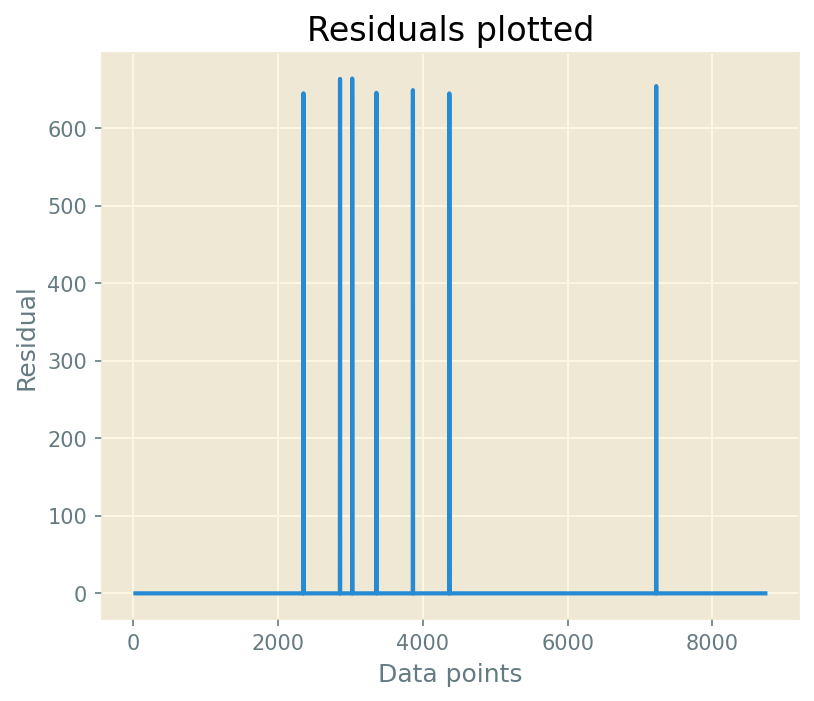

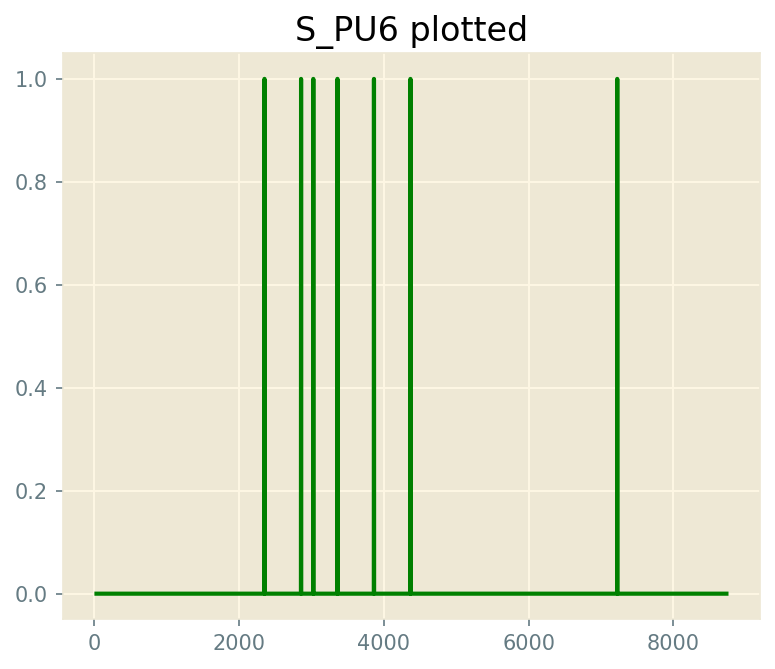

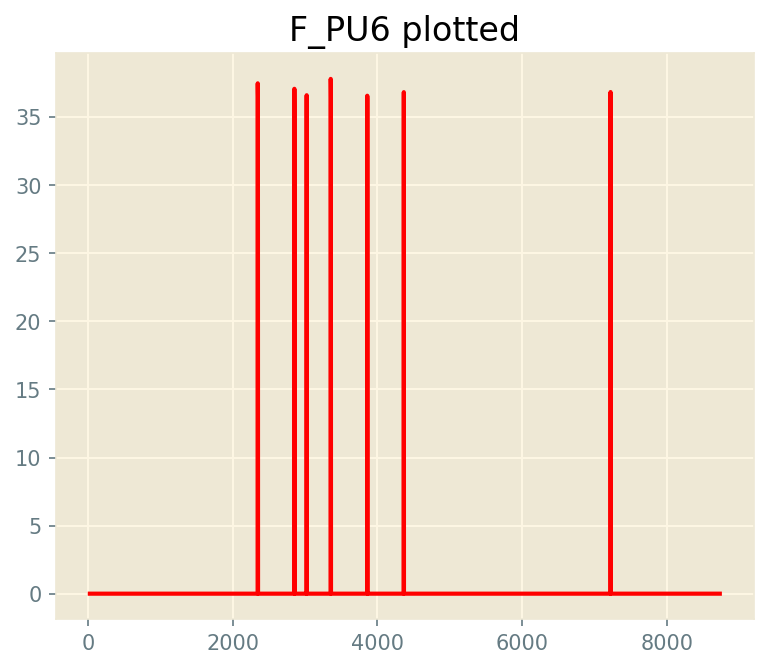

<Figure size 900x750 with 0 Axes>

In [195]:

print(df.columns)
df_normalized = normalize(df[[ 'F_PU6', 'S_PU6']])
## Residuals 
pca = PCA(n_components=2)
pca.fit(df_normalized)
df_inverse_transformed = pca.inverse_transform(df_normalized)
pca_residual = df_normalized - df_inverse_transformed
pca_residual = np.square(pca_residual)
pca_residual_combined = pca_residual.sum(axis=1) 

figure, ax = plt.subplots()
plt.xlabel('Data points')
plt.ylabel('Residual')
plt.title("Residuals plotted")
ax.plot(pca_residual_combined)
print(plt.figure())

# add values 
y1 = df['S_PU6'].values 
plt.title("S_PU6 plotted")
plt.plot(y1, color='g', label='F_PU6')
print(plt.figure())
y = df['F_PU6'].values 
plt.title("F_PU6 plotted")
plt.plot(y, color='r', label='F_PU6')
print(plt.figure())
# figure.savefig('pcaresidual.png')

#### Drop Abnormalities
*Do you see large abnormalities in the training data? Can you explain why these occur? It is best to remove such abnormalities from the training data since you only want to model normal behavior:*

<!-- step 3: did abnormalities arrise in step#2 ? yes -> remove abnormalities -->
This plot shows a few clear abnormalities. They occur when 2 sensors disagree on what the value for a signal should be. These need to be removed as they can affect the principal components. After removal the mean of the time series is no longer 0, and the data no longer has unit-variance. So, we re-normalize the cleaned data to achieve this again.

In [197]:
df_normalized = normalize(df)
## Residuals 
pca = PCA()
pca.fit(df_normalized)
df_inverse_transformed = pca.inverse_transform(df_normalized)
pca_residual = df_normalized - df_inverse_transformed
pca_residual = np.square(pca_residual)
pca_residual_combined = pca_residual.sum(axis=1) 

## Drop the abnormalities
indices_to_drop = np.where(pca_residual_combined > 2000)
print(indices_to_drop)
index = indices_to_drop[0]
print('before', df_normalized.shape)
df_cleaned = df_normalized.copy()
for index in indices_to_drop:
    row = df.iloc[index]
    df_cleaned = df_normalized.drop(row.index)
print('after', df_cleaned.shape)

(array([2348, 2349, 2350, 2854, 2855, 3000, 3001, 3023, 3024, 3336, 3337,
       3356, 3357, 3358, 3861, 3862, 4365, 4366, 7222, 7223], dtype=int64),)
before (8761, 44)
after (8741, 44)





<!-- step 4: Tune parameters -> number of principal componenets (that capture a big percentage of the variance and the threshold.) -->
Next we need to tune the parameters, primarily the number of principal components we will use. We need a number of components that captures a big percentage of the variance. In order to decide this we plot the fraction of variance captured by each principle component, for this plot see figure varplot.


In [105]:
# Re-normalize
df_cleaned_normalized = normalize(df_cleaned)

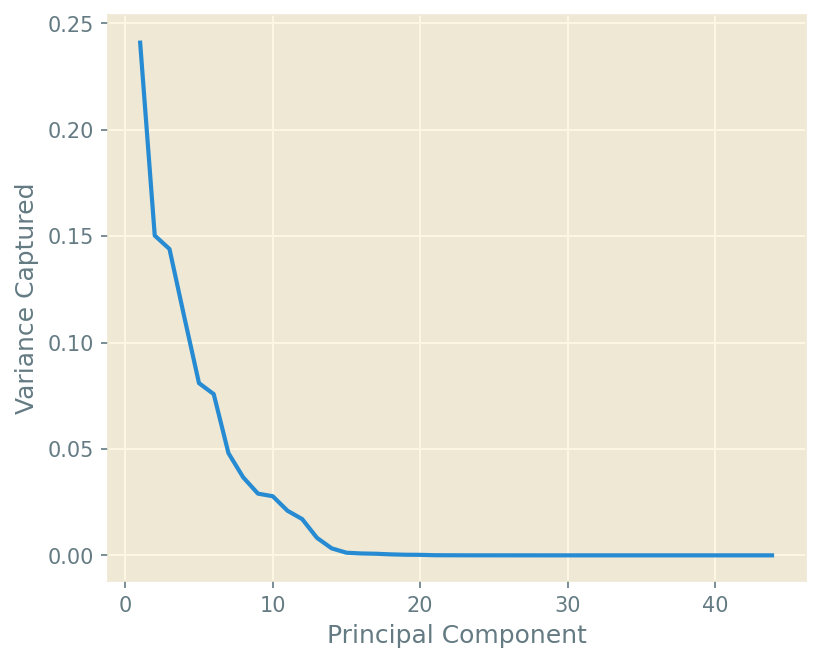

In [106]:
## Find importance of each principal component
pca = PCA()
pca.fit(df_cleaned_normalized)
x_axis = np.arange(1, df_cleaned_normalized.shape[1]+1, 1)
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured')
plt.plot(x_axis, pca.explained_variance_ratio_)

 Then, we plot the cumulative variance captured by an increasing number of principal components in figure cumulativevarplot. Reading from this plot we can see that at 15 principal components, about 99\% of the variance should be captured. 

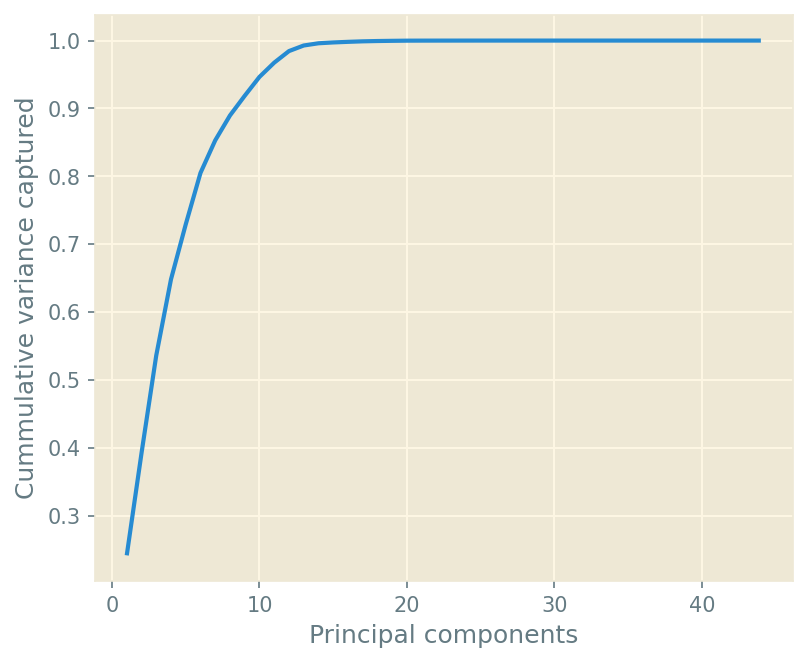

In [107]:
# Cummulative Variance
cummulative_variance = pca.explained_variance_ratio_.cumsum()
x_axis = np.arange(1, df_cleaned_normalized.shape[1]+1, 1)
plt.xlabel('Principal components')
plt.ylabel('Cummulative variance captured')
plt.plot(x_axis, cummulative_variance)

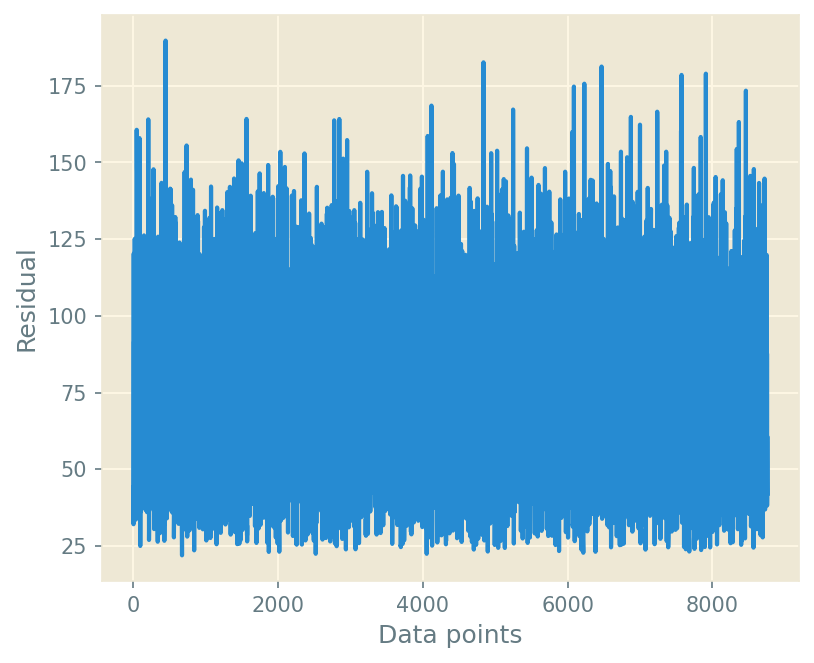

<Figure size 900x750 with 0 Axes>

In [108]:
# Residual is now low
pca = PCA()
pca.fit(df_cleaned_normalized)
df_inverse_transformed = pca.inverse_transform(df_cleaned_normalized)
pca_residual = df_cleaned_normalized - df_inverse_transformed
pca_residual = np.square(pca_residual)
pca_residual_combined = pca_residual.sum(axis=1) 

figure, ax = plt.subplots()
plt.xlabel('Data points')
plt.ylabel('Residual')
plt.figure()
ax.plot(pca_residual_combined)



<!--  step 5: optimize the threshold using a statistical test for the residual vector -->
The thresholds are set to the maximum and minimum residual of the training data, (this will result in 0 false positives in the training data).

In [114]:
# Find threshold 
pca = PCA(n_components=15)
# pca.fit(df_cleaned_normalized)
transformed = pca.fit_transform(df_cleaned_normalized)
df_inverse_transformed = pca.inverse_transform(transformed)
pca_residual = df_cleaned_normalized - df_inverse_transformed
pca_residual = np.square(pca_residual)
pca_residual_combined = pca_residual.sum(axis=1) 

# Set threshold
threshold_max = np.max(pca_residual_combined)
threshold_min = np.min(pca_residual_combined)

TP=92
FP=4



<a id='3b'></a>

### 3b. Analysis and answers to the questions
*Describe the kind of anomalies you can detect using PCA.*

<!-- step 6: run analysis using PCA on test dataset -->
We now run the PCA analysis using 15 principal components on the test data. Any resulting residuals that are either above the maximum threshold or below the minimum are marked as possible attacks.

The PCA analysis results in 123 true positives being detected and 22 false positives, see the graph below for a visual representation. The PCA analysis seems to detect anomalies at each of the labelled attack moments, but it does detect a few loose false positives. 

If we increase the maximum threshold by a factor of 2, and decrease the minimum by dividing it by 2, we can improve the model so that it generates 92 true positives and only 4 false positives. Using these exaggerated thresholds we still detect at least once during each attack in the dataset.

TP=92
FP=4


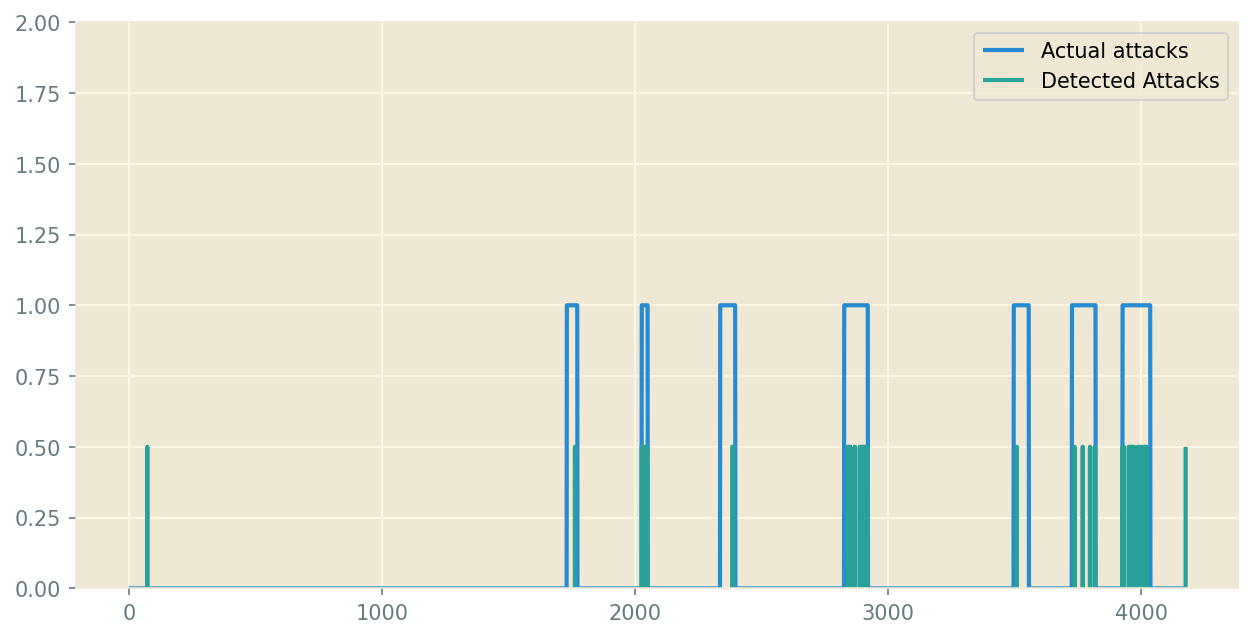

In [170]:
# Prepare the test dataset
test_dataset = normalize(df_attacks.drop('DATETIME', axis=1).drop(' ATT_FLAG', axis=1))

# analyse test set
pca = PCA(n_components=15)
pca.fit(test_dataset)
transformed = pca.fit_transform(test_dataset)
reconstructed = pca.inverse_transform(transformed)

residual_pca = test_dataset - reconstructed
residual_pca = np.square(residual_pca)
residual_pca = residual_pca.sum(axis=1) 

# Find attacks using the thresholds set using the training set
attack_indices = np.where((residual_pca > threshold_max * 2))
attack_indices2 = np.where((residual_pca < threshold_min * 0.5))

all_detected_attacks = np.append(attack_indices[0], attack_indices2[0])

TP = 0
FP = 0
for index in all_detected_attacks:
    if index in list(df_attacks.loc[df_attacks[' ATT_FLAG']==1].index):
        TP +=1
    else:
        FP +=1 

print(f'TP={TP}\nFP={FP}')
def plot_attacks(residuals, attacks, detected_anomalies):
    show_from = 0
    show_to = 5000
    detected_attacks = []
    for a in range(len(attacks)):
            if a in detected_anomalies:
                detected_attacks.append(0.5)
            else:
                detected_attacks.append(-99)

    detected_attacks = pd.DataFrame(detected_attacks)
    plt.figure(figsize=[10,5])
    residuals = residuals - np.mean(residuals)
#     plt.plot(residuals[show_from:show_to], label="residuals (normalized)")
    plt.plot(attacks[show_from:show_to], label="Actual attacks")
    plt.plot(detected_attacks[show_from:show_to], label="Detected Attacks")

    axes = plt.gca()
    axes.set_ylim([0,2])
    plt.legend()
    plt.savefig('pca_plot.png')
    plt.show()
    
plot_attacks(residual_pca, df_attacks[' ATT_FLAG'], all_detected_attacks)


<a id='4'></a>

## 4. ARMA task – 1/2 A4 - Individual
Learn an autoregressive moving average model (see Wikipedia for an introduction if unfamiliar) for each individual sensor. Most statistical packages (statsmodels in Python) contain standard algorithms for fitting these models to training data. Use autocorrelation plots in order to identify the order of the ARMA models. The parameters can be determined using Akaike’s Information Criterion (AIC) or another model selection method. Note that there exists a wide range of ARMA variants; you only have to use the basic model. Plots the residual errors and study some of the detected anomalies. What kind of anomalies can you detect using ARMA models? Which sensors can be modeled effectively using ARMA  

In [8]:
%pip install scipy

# Make sure you have statsmodels >0.9.0 as it fails to import statsmodels.api
# see https://github.com/statsmodels/statsmodels/issues/5759
%pip install git+https://github.com/statsmodels/statsmodels
    
# If the cell below this runs successfully you do NOT need this, especially the line 'import statsmodels.api as sm'

Note: you may need to restart the kernel to use updated packages.


'C:\tools\Anaconda3\envs\Cyber' is not recognized as an internal or external command,
operable program or batch file.


Note: you may need to restart the kernel to use updated packages.


'C:\tools\Anaconda3\envs\Cyber' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
import numpy as np
# from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

mpl.rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = 6,5


ModuleNotFoundError: No module named 'statsmodels'

## Autocorrelation function
We calculate the autocorrelation and partial autocorrelation functions to make an informed descision about what ARMA parameters to use.

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# from statsmodels.graphics.tsaplots import plot_acf
fig = sm.graphics.tsa.plot_acf(df['F_PU1'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['F_PU1'], lags=40, ax=ax2)

In [ ]:
# "The higher the AR order gets, the lower the AIC gets." you care about the rate of change. When the AIC does not drop substantially with the increase of an AR term, the search can stop for that sensor. 
def test_arma_params(train_series, params):
    # Find optimal parameters based on AIC 
    arma_mod = sm.tsa.ARMA(train_series, (0,0)).fit()
    
    zero_aic = arma_mod.aic
    best_params = params[0]
    lowest_aic = arma_mod.aic
    prev_aic = arma_mod.aic
    
    print(f"first aic is {prev_aic}")
    for param_set in params:
        print("testing " + str(param_set))
        try:
            arma_mod = sm.tsa.ARMA(train_series, param_set).fit()
            print(str(arma_mod.aic))
        except:
            continue
        print(f"Change: {arma_mod.aic - prev_aic}, change vs first: {arma_mod.aic - zero_aic}")
        prev_aic = arma_mod.aic
        if arma_mod.aic < lowest_aic:
            lowest_aic = arma_mod.aic
            best_params = param_set
            
    print('best params: ' + str(best_params))


def do_arma(train_series, test_series, params, attack_flags):
    print(f'####################################\nCurrent Series: {train_series.name}\n####################################')
    train_model = sm.tsa.ARMA(train_series, params).fit()#method='mle', trend='nc')
    test_model = sm.tsa.ARMA(test_series, params).fit(start_params = train_model.params)#, transpars = False, method='mle', trend='nc')

    #The equations are somewhat simpler if the time series is first reduced to zero-mean by subtracting the sample mean. Therefore, we will work with the mean-adjusted series

    # Plotting the residuals
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    resid = test_model.resid
    ax = resid.plot(ax=ax);

    # +
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    fig = qqplot(resid, line='q', ax=ax, fit=True)
    # -

    # ## ARMA Model Autocorrelation
    print("Autocorrelation plots:")
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

    # ## Prediction
#     prediction = test_model.predict()
#     pd.DataFrame({"prediction":prediction[100:400],
#                 "actual": train_series[100:400]}).plot(figsize=(20,10))

    # ## Anomaly detection    
    resid = test_model.resid
    std = np.std(resid)
    anomaly_thresh = 2 * std
    detected_anomalies = test_model.resid[(resid) > anomaly_thresh]
    
    test_model = pd.DataFrame({ 'ATT_FLAG': attack_flags })
    tp=0
    fp=0
    for index, _ in detected_anomalies.items():
        if attack_flags[index]==1:
            tp+=1
        else:
            fp+=1
    tn=test_model.loc[attack_flags==-999].shape[0]-fp
    fn=test_model.loc[attack_flags==1].shape[0]-tp
    acc=100.0*(tp+tn)/(tp+tn+fp+fn)
    if (tp+fp)!=0:
        prec= 100.0 *tp / (tp + fp)
    else:
        prec=0
    print(f"TP: {tp}")
    print(f"FP: {fp}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    return detected_anomalies, resid

In [ ]:
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def plot_attacks(residuals, attacks, detected_anomalies, show_range = (0,5000)):
    show_from = show_range[0]
    show_to = show_range[1]
    detected_attacks = []
    for a in range(len(df_attacks)):
            if a in detected_anomalies:
                detected_attacks.append(0.7)
            else:
                detected_attacks.append(-999)

    detected_attacks = pd.DataFrame(detected_attacks)
    plt.figure()
    residuals = residuals - np.mean(resid)
    plt.plot(residuals[show_from:show_to], label="residuals")
    plt.plot(attacks[show_from:show_to], label="Attacks")
    plt.plot(detected_attacks[show_from:show_to], label="Detected Attacks")

    axes = plt.gca()
    axes.set_ylim([np.min(residuals)*2,max(np.max(residuals)*1.5, 2)])
    plt.legend()
    plt.savefig("savedplot.png")
    plt.show()


In [ ]:
# L_T4
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 5,0
# param_sets = [(5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8)] # best 5,2
# test_arma_params(df['L_T4'], param_sets)

anomalies, resid = do_arma(df['L_T4'], df_attacks[' L_T4'], (0,0), df_attacks[' ATT_FLAG'])
# Zoom in on especially Attack#5 and 6, which attacks F_PU7, affecting L_T4
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (3000,4000))

# L_T1
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 4,0
# param_sets = [(4,0), (4,1), (4,2), (4,3), (4, 4), (4,5), (4,6)] # best 4,2
# test_arma_params(df['L_T1'], param_sets)

anomalies, resid = do_arma(df['L_T1'], df_attacks[' L_T1'], (4,2), df_attacks[' ATT_FLAG'])
# zoom in on attacks 3 and 4 specifically
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (1500,3000))

# L_T7
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 3,0
# param_sets = [(3,0), (3,1), (3,2), (3,3), (3, 4), (3,5), (3,6)] # best 3,0 or 3,4
# test_arma_params(df['L_T7'], param_sets)

anomalies, resid = do_arma(df['L_T7'], df_attacks[' L_T7'], (3,0), df_attacks[' ATT_FLAG'])
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (1500,3000))

# P_J300
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 5,0
# param_sets = [(5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6)] # best 5,6
# test_arma_params(df['P_J300'], param_sets)

anomalies, resid = do_arma(df['P_J300'], df_attacks[' P_J300'], (5,6), df_attacks[' ATT_FLAG'])
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (1500, 3000))

# F_PU10
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 2,0
# param_sets = [(2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6)] # best 2,2 or 2,5
# test_arma_params(df['F_PU10'], param_sets)

anomalies, resid = do_arma(df['F_PU10'], df_attacks[' F_PU10'], (2,5), df_attacks[' ATT_FLAG'])
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies)


<a id='4a'></a>

### 4a. Print relevant plots and/or metrics to determine the parameters.


<a id='4b'></a>

### 4b. Plots to study the detected anomalies


<a id='4c'></a>

### 4c. Analysis and answers to the questions


<a id='5'></a>

## 5. N-gram task – 1/2 A4 - Individual
Discretize the sensor data using percentiles. Visualize the discretization. Apply N - grams to sliding windows with a length of your choosing in order to find anomalies. Choose a value for N, and a value for a larger sliding window containing the N - grams. Count the occurrence frequencies of the N - grams in each window. Make a table with the different windows as rows and n - grams as columns, in each cell you put the counts for that n - gram in that window. Use a distance measure of your choice (tip: cosine) and detect anomalies using a simple nearest neighbor approach. Plot the What kind of ano malies can you detect? Which sensors can be modeled effectively using N - grams ? 

In [10]:
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation
from nltk import ngrams
from collections import Counter

def n_grams(n, data):
    gram = []
    for gr in ngrams(data, n):
        gram.append(''.join(gr))
    return gram

ModuleNotFoundError: No module named 'tslearn'

In [ ]:
# Add all the code from Task1 notebook?? (menno's last year) 
# we performed SymbolicAggregateApproximation is this okay??


<a id='5a'></a>

### 5a. Visualise discretization


<a id='5b'></a>

### 5b. Analysis and answers to the questions. Also provide relevant plots.


<a id='6'></a>

## 6.Comparision task 1 A4 - Individual
Compare the performance of the four implemented methods. It is ok if some method’s implementations are less thorough. The goal of this task is to set up a sound comparison and evaluation, not implement new methods. Evaluating anomaly detection methods in not straightforward, and different research studies frequently use dif ferent measures. You can either: 

- test point - wise precision and recall, or 
- overlap - based false and true positives, or /and 
- count a true positive if it detects at least one anomaly in an anomalous region, or 
- compare the top - k detected anomalies,
- or... Describe in a few lines which comparison method you chose for this data and why. 

Keep in mind that in practice an analyst has to take action on every positive detected but will not study every detected data point. Which methods do you advice to use for the BATADAL data ?


<a id='6a'></a>

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.